Load the previously saved csv files

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime as dt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

Import topographic mapping shp file 

In [2]:
shapefile = gpd.read_file("topgraphic-mapping-poles-wgs84/TOPO_POLES_WGS84.shp")

In [230]:
shapefile.head()

,geometry
0,POINT (-79.35169 43.69973)
1,POINT (-79.35657 43.69672)
2,POINT (-79.35651 43.69669)
3,POINT (-79.35629 43.69699)
4,POINT (-79.35614 43.69725)


Convert the shp file to GeoDataFrame:

In [403]:
topo_gdf = gpd.GeoDataFrame(data = shapefile, geometry = shapefile.geometry)
topo_gdf.head()

,geometry
0,POINT (-79.35169 43.69973)
1,POINT (-79.35657 43.69672)
2,POINT (-79.35651 43.69669)
3,POINT (-79.35629 43.69699)
4,POINT (-79.35614 43.69725)


Load `neighbourhoods` shp file.

In [404]:
neighbourhoods = gpd.read_file('toronto_neighbourhoods.shp')
neighbourhoods.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry
0,2101,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,2102,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,2103,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,2104,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,2105,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


In [405]:
# Write your code here.
#select columns needed and rename field 8 to name
neighbourhoods = neighbourhoods[['geometry', 'FIELD_8']].rename(columns = {'FIELD_8':'name'})
neighbourhoods['name'] = neighbourhoods['name'].str.replace(r'\s*\(\d+\)', '', regex=True)
# View GeoDataFrame
neighbourhoods.head()

,geometry,name
0,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",Wychwood
1,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",Yonge-Eglinton
2,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",Yonge-St.Clair
3,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",York University Heights
4,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",Yorkdale-Glen Park


Check the crs of both `neighbourhoods` and `topo_gdf` GeoDataFrames.

In [406]:
neighbourhoods.crs
neighbourhoods = neighbourhoods.to_crs(epsg=26917)

In [407]:
topo_gdf.crs

Load the cyclist collision data and remove all the collision accidents prior to 2018.

In [408]:
collision_shp = gpd.read_file("Cyclists.shp")

In [409]:
collision_gdf = gpd.GeoDataFrame(data = collision_shp, geometry = collision_shp.geometry)
collision_gdf = collision_gdf.loc[collision_gdf['YEAR'] >=2018]
collision_gdf.head(20)

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURH,HOOD_140,NEIGHBOU_1,DIVISION,ObjectId,geometry
1001,80923405,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1002,POINT (-8844666.500 5433115.618)
1002,80923406,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1003,POINT (-8844666.500 5433115.618)
1003,80937623,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1004,POINT (-8834934.394 5419362.224)
1004,80937624,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1005,POINT (-8834934.394 5419362.224)
1005,80926724,None,2018,2018-02-03,1525,8 HERTFORD AVE,None,30 m North of,Local,Etobicoke York,...,None,None,None,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,1006,POINT (-8847375.794 5417393.496)
1006,81514422,None,2018,2018-02-03,1525,8 HERTFORD AVE,None,30 m North of,Local,Etobicoke York,...,None,None,None,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,1007,POINT (-8847375.794 5417393.496)
1007,80913986,None,2018,2018-04-13,1918,THE WESTWAY,KIPLING AVE,11 m South of,Major Arterial,Etobicoke York,...,None,None,None,7,Willowridge-Martingrove-Richview,7,Willowridge-Martingrove-Richview (7),D23,1008,POINT (-8855984.241 5416909.038)
1008,80913987,None,2018,2018-04-13,1918,THE WESTWAY,KIPLING AVE,11 m South of,Major Arterial,Etobicoke York,...,None,None,None,7,Willowridge-Martingrove-Richview,7,Willowridge-Martingrove-Richview (7),D23,1009,POINT (-8855984.241 5416909.038)
1009,80941372,None,2018,2018-05-15,1558,LAKE SHORE BV W,COLBORNE LODGE DR,None,Major Arterial,Toronto and East York,...,Yes,None,None,85,South Parkdale,85,South Parkdale (85),D11,1010,POINT (-8845322.172 5409546.926)
1010,80941373,None,2018,2018-05-15,1558,LAKE SHORE BV W,COLBORNE LODGE DR,None,Major Arterial,Toronto and East York,...,Yes,None,None,85,South Parkdale,85,South Parkdale (85),D11,1011,POINT (-8845322.172 5409546.926)


pie chart (traffic control)

In [410]:
traffic_control = collision_gdf.groupby('TRAFFCTL').agg({'INDEX_': 'count'}).reset_index()

traffic_control

,TRAFFCTL,INDEX_
0,No Control,201
1,Stop Sign,38
2,Traffic Controller,4
3,Traffic Signal,157


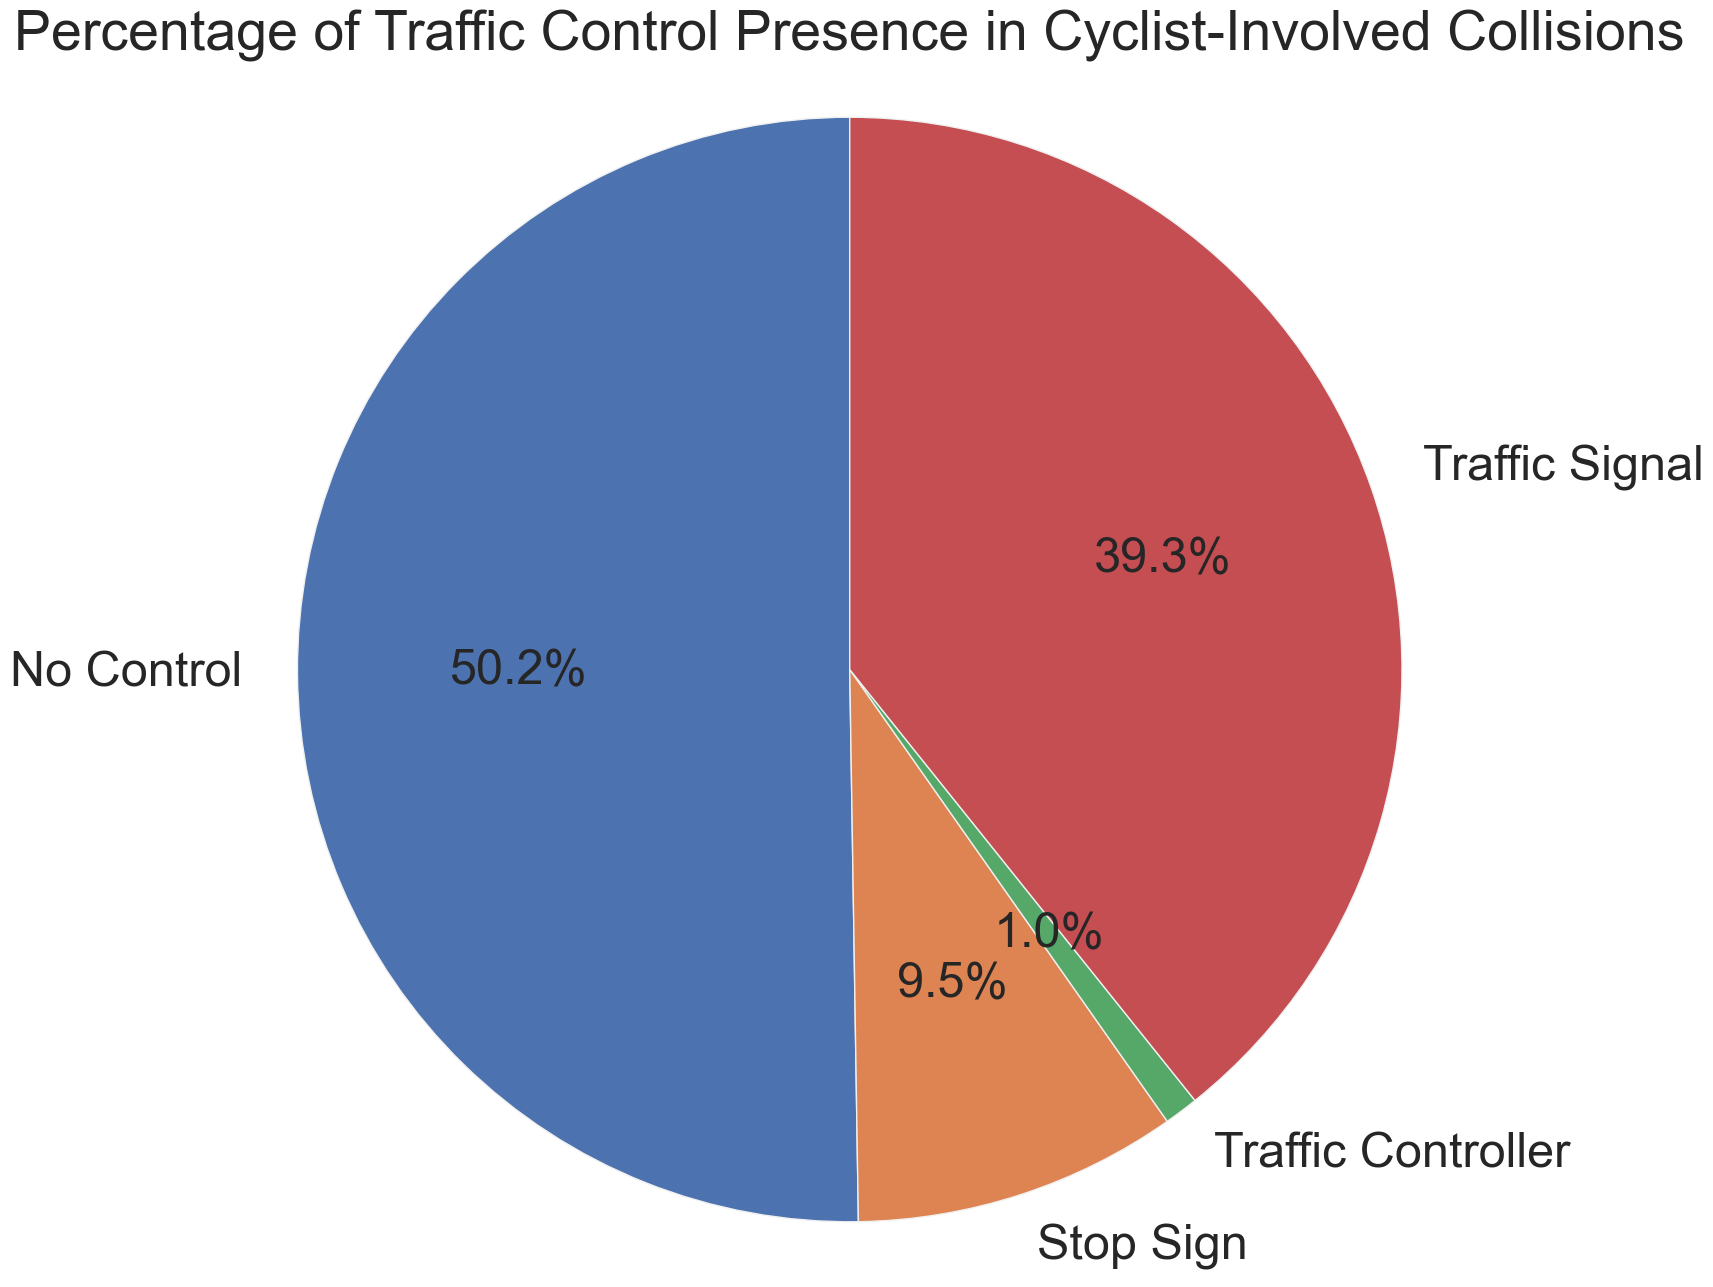

In [415]:
plt.figure(figsize=(15, 15), facecolor='white')
custom_colors = sns.color_palette('deep')[0:4]
plt.pie(traffic_control['INDEX_'], labels=traffic_control['TRAFFCTL'], autopct='%1.1f%%', startangle=90, colors=custom_colors, textprops={'fontsize': 35})
plt.title('Percentage of Traffic Control Presence in Cyclist-Involved Collisions', fontsize = 40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.savefig('/Users/joycechen/Desktop/python figure/traffic_ctl_percentage.png',bbox_inches='tight',facecolor='white', edgecolor='none')


pie chart (collision location)

In [46]:
collision_gdf['ACCLOC'].unique()
col_loc = collision_gdf.groupby('ACCLOC').agg({'INDEX_': 'count'}).reset_index()

col_loc

,ACCLOC,INDEX_
0,At Intersection,236
1,At/Near Private Drive,50
2,Intersection Related,41
3,Non Intersection,71
4,Overpass or Bridge,2


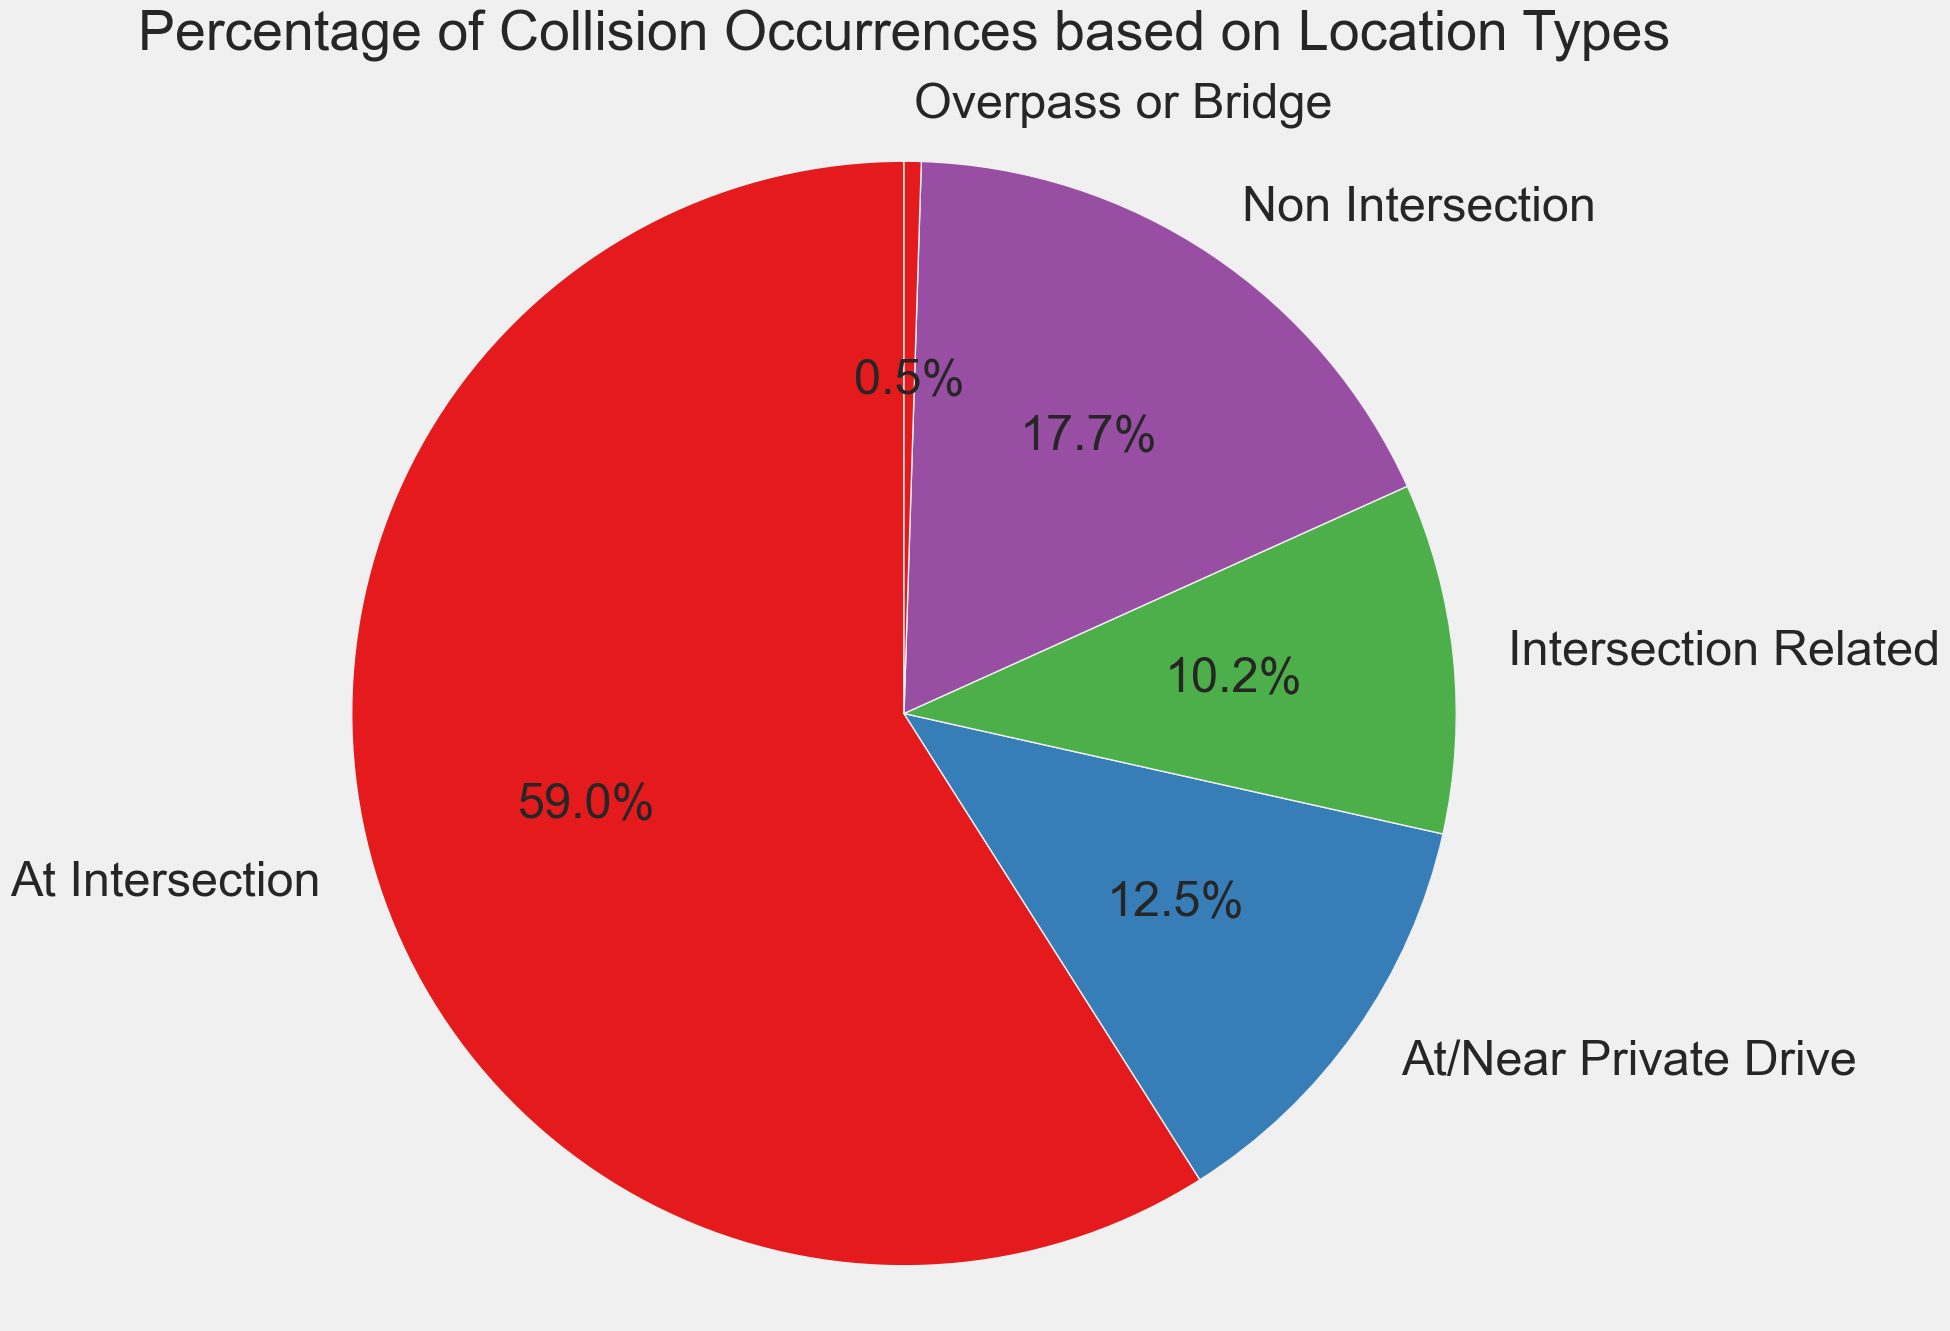

In [418]:
plt.figure(figsize=(15,15))
custom_colors = sns.color_palette('Set1')[0:4]
plt.pie(col_loc['INDEX_'], labels=col_loc['ACCLOC'], autopct='%1.1f%%', startangle=90, colors=custom_colors, textprops={'fontsize': 35})
plt.title('Percentage of Collision Occurrences based on Location Types', fontsize = 40,pad=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.savefig('/Users/joycechen/Desktop/python figure/collision_loc.png',bbox_inches='tight',facecolor='white', edgecolor='none')

collison vs time

In [104]:
collision_gdf['DATE'] = pd.to_datetime(collision_gdf['DATE'] )

collision_month = collision_gdf
collision_month['month'] = collision_month['DATE'].dt.month 
collision_month['year'] = collision_month['DATE'].dt.year
collision_month = collision_month.groupby(['month','year']).agg({'INDEX_':'count'}).reset_index()
collision_month['percentage'] = collision_month.groupby('month')['INDEX_'].transform(lambda x: x / x.sum() * 100)#.sort_values('year')

month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Replace numbers with month names using map()
collision_month['month'] = collision_month['month'].map(month_mapping)

collision_month

,month,year,INDEX_,percentage
0,Jan,2018,4,66.666667
1,Jan,2021,2,33.333333
2,Feb,2018,2,50.000000
3,Feb,2022,2,50.000000
4,Mar,2019,4,30.769231
5,Mar,2020,5,38.461538
6,Mar,2021,4,30.769231
7,Apr,2018,2,9.090909
8,Apr,2019,2,9.090909
9,Apr,2020,4,18.181818


In [212]:
collision_month_basic = collision_month.groupby('month').agg({'INDEX_':'sum'}).reset_index()

# Dictionary to map month names to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Create a new column 'month_number' based on the mapping
collision_month_basic['month_number'] = collision_month_basic['month'].map(month_map)
                                         
collision_month_basic = collision_month_basic.sort_values('month_number')

collision_month_basic.head()

,month,INDEX_,month_number
4,Jan,6,1
3,Feb,4,2
7,Mar,13,3
0,Apr,22,4
8,May,42,5


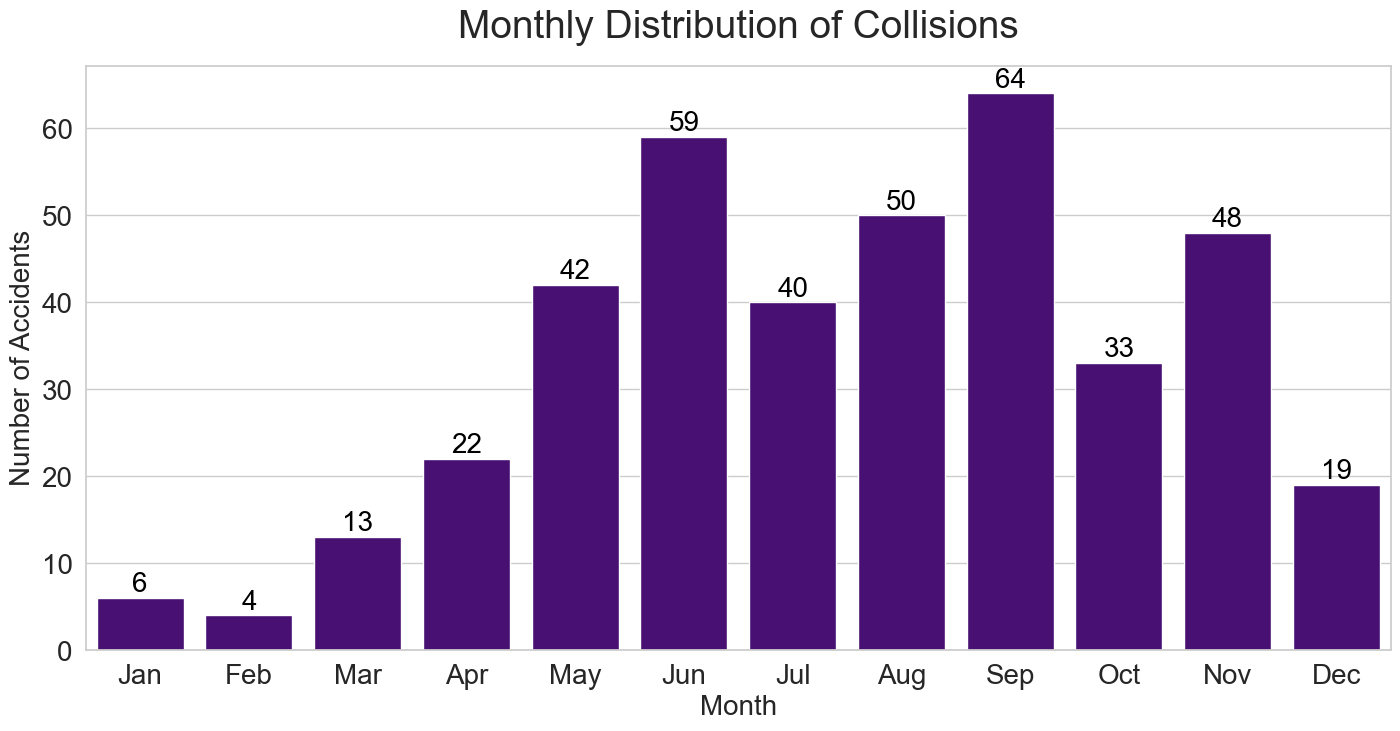

In [423]:


plt.figure(figsize=(15, 15), facecolor='white')
bar_plot = sns.barplot(data=collision_month_basic, x='month', y='INDEX_', color='indigo')

# Title and labels
plt.title('Monthly Distribution of Collisions', fontsize=28, pad = 20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)

threshold = 1  # Set a threshold for the height of bars to display labels
sns.set_style("whitegrid")

for p in bar_plot.patches:
    height = p.get_height()
    if height > threshold:
        plt.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=20, color='black')
plt.gca().set_aspect(0.08)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('/Users/joycechen/Desktop/python figure/collision_by_month_basic.png', bbox_inches='tight', facecolor='white', edgecolor='none',transparent = True)



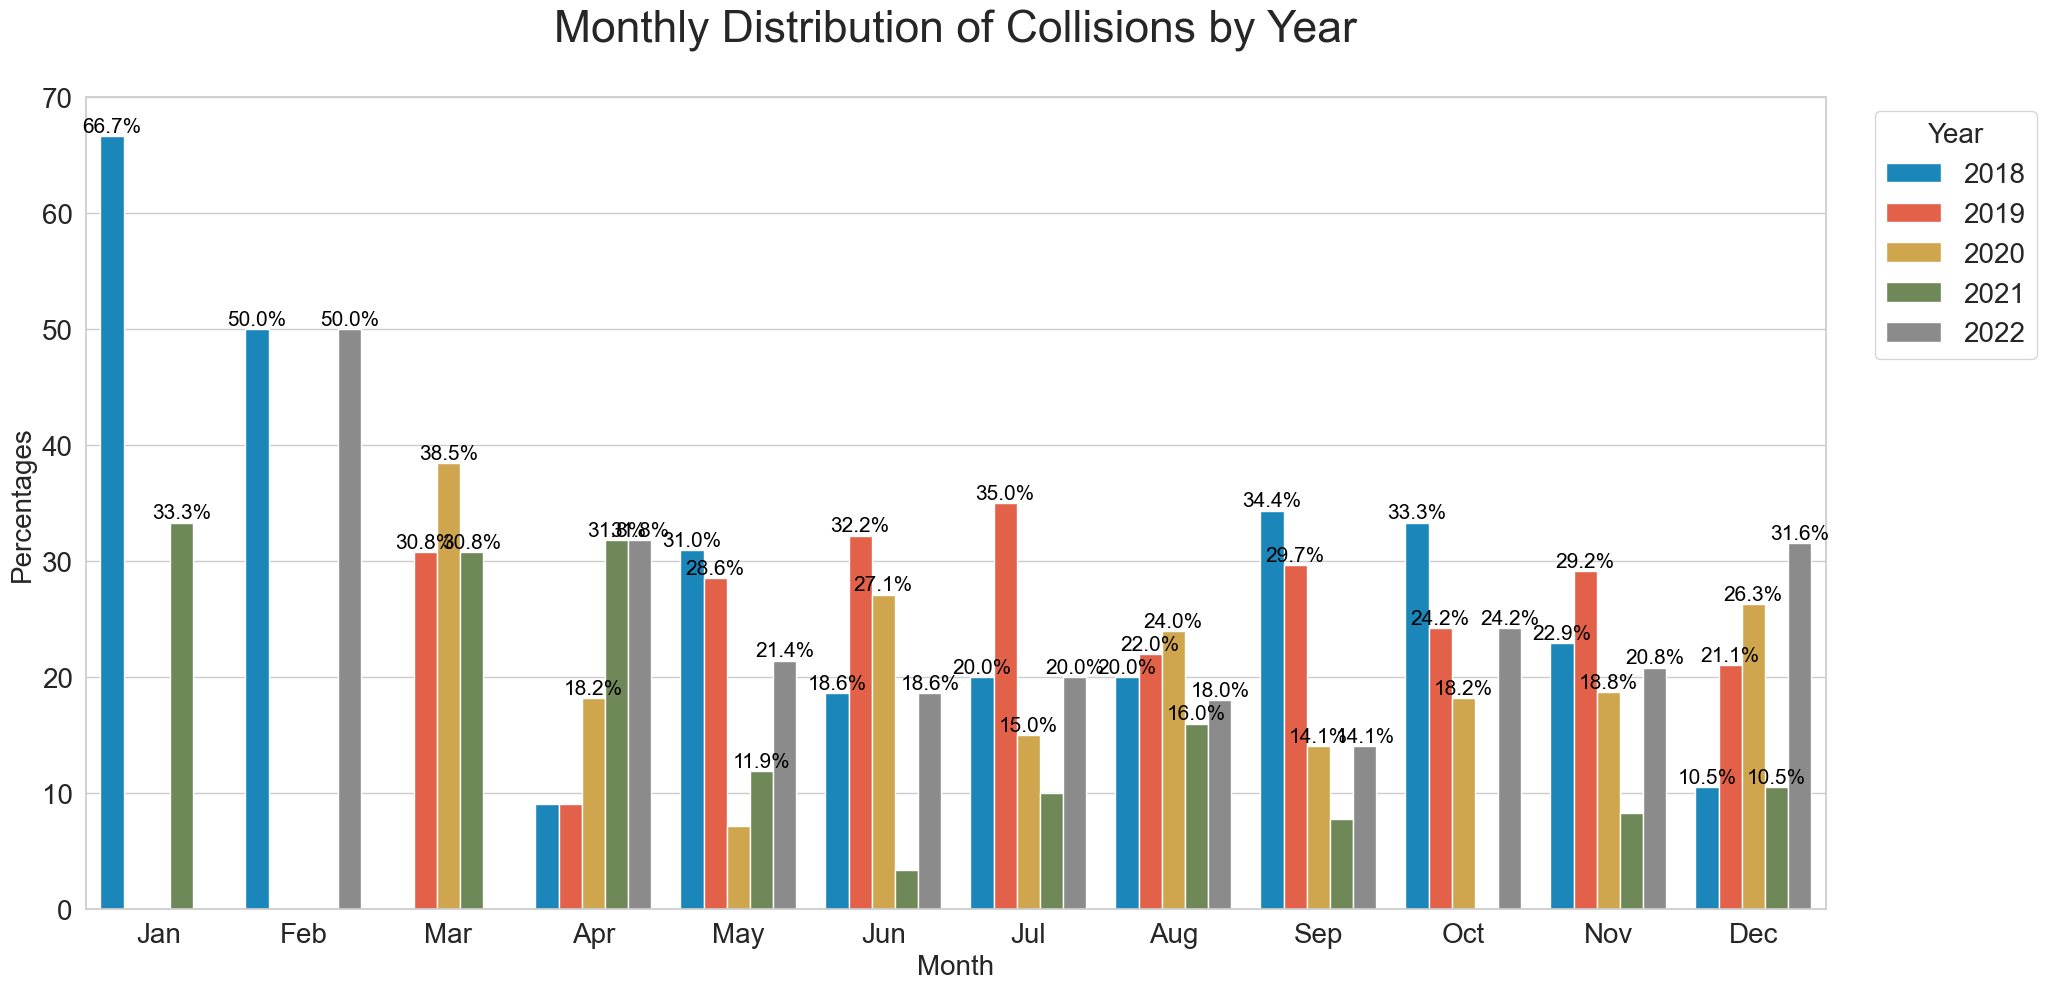

In [432]:
plt.figure(figsize=(20, 20), facecolor='white')
bar_plot = sns.barplot(data=collision_month, x='month', y='percentage', hue='year')

# Title and labels
plt.title('Monthly Distribution of Collisions by Year', fontsize=32, pad = 40)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Percentages', fontsize=20)

threshold = 10  # Set a threshold for the height of bars to display labels
sns.set_style("whitegrid")

for p in bar_plot.patches:
    height = p.get_height()
    if height > threshold:
        plt.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=15, color='black')
plt.gca().set_aspect(0.08) 
plt.legend(title='Year', title_fontsize=20,bbox_to_anchor=(1.02, 1), loc='upper left', facecolor = 'white', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('/Users/joycechen/Desktop/python figure/collision_by_month.png', bbox_inches='tight', facecolor='white', edgecolor='none',transparent = True)




collision by year

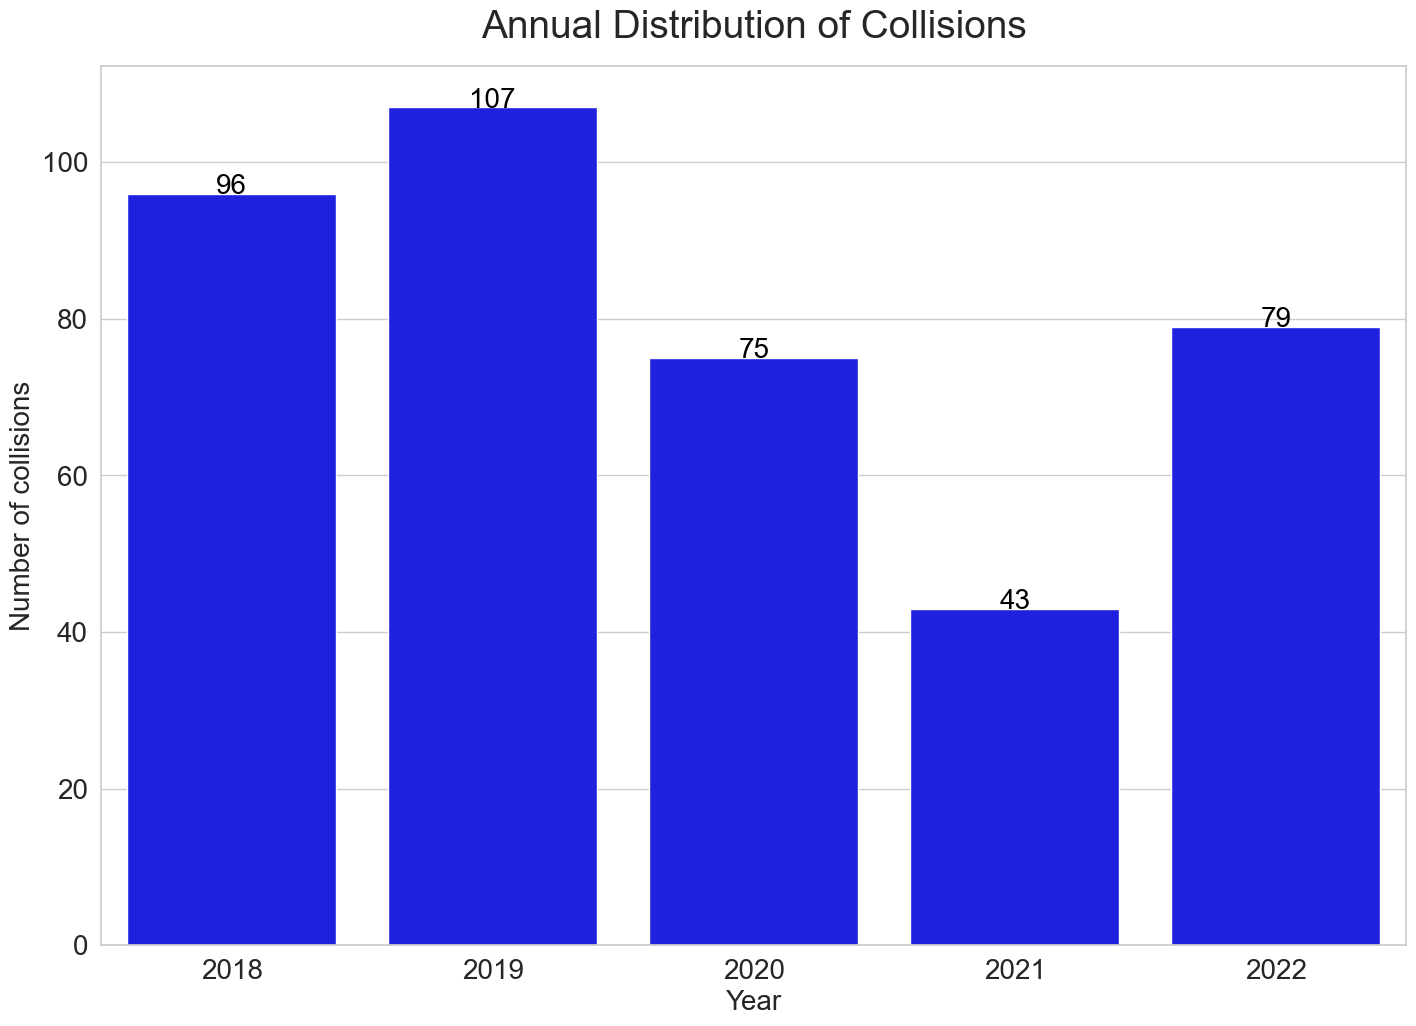

In [447]:
collision_year = collision_gdf
collision_year['DATE'] = pd.to_datetime(collision_year['DATE'])
collision_year['year'] = collision_year['DATE'].dt.year
collision_year1 = collision_year.groupby(['year']).agg({'INDEX_':'count'}).reset_index()

fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(data=collision_year1, x='year', y='INDEX_', color='blue', ax=ax)

plt.title('Annual Distribution of Collisions', fontsize=28, pad=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of collisions', fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_aspect(0.03)  # Adjust the aspect ratio as needed

plt.savefig('/Users/joycechen/Desktop/python figure/collision_by_year.png', bbox_inches='tight', facecolor='white', edgecolor='none',transparent = True)


Involvement type (percentages) by year

In [449]:
collision_year = collision_gdf

collision_year['year'] = collision_gdf['DATE'].dt.year
collision_year = collision_year.groupby(['year','INVTYPE']).agg({'INDEX_':'count'}).reset_index()
collision_year['percentage'] = collision_year.groupby('year')['INDEX_'].transform(lambda x: x / x.sum() * 100)
#collision_year['percentage'] = 100*collision_year['INDEX_']/collision_year['INDEX_'].sum()
collision_year

,year,INVTYPE,INDEX_,percentage
0,2018,Cyclist,45,46.875000
1,2018,Cyclist Passenger,1,1.041667
2,2018,Driver,39,40.625000
3,2018,Motorcycle Driver,1,1.041667
4,2018,Other,2,2.083333
5,2018,Passenger,5,5.208333
6,2018,Truck Driver,3,3.125000
7,2019,Cyclist,46,42.990654
8,2019,Cyclist Passenger,1,0.934579
9,2019,Driver,46,42.990654


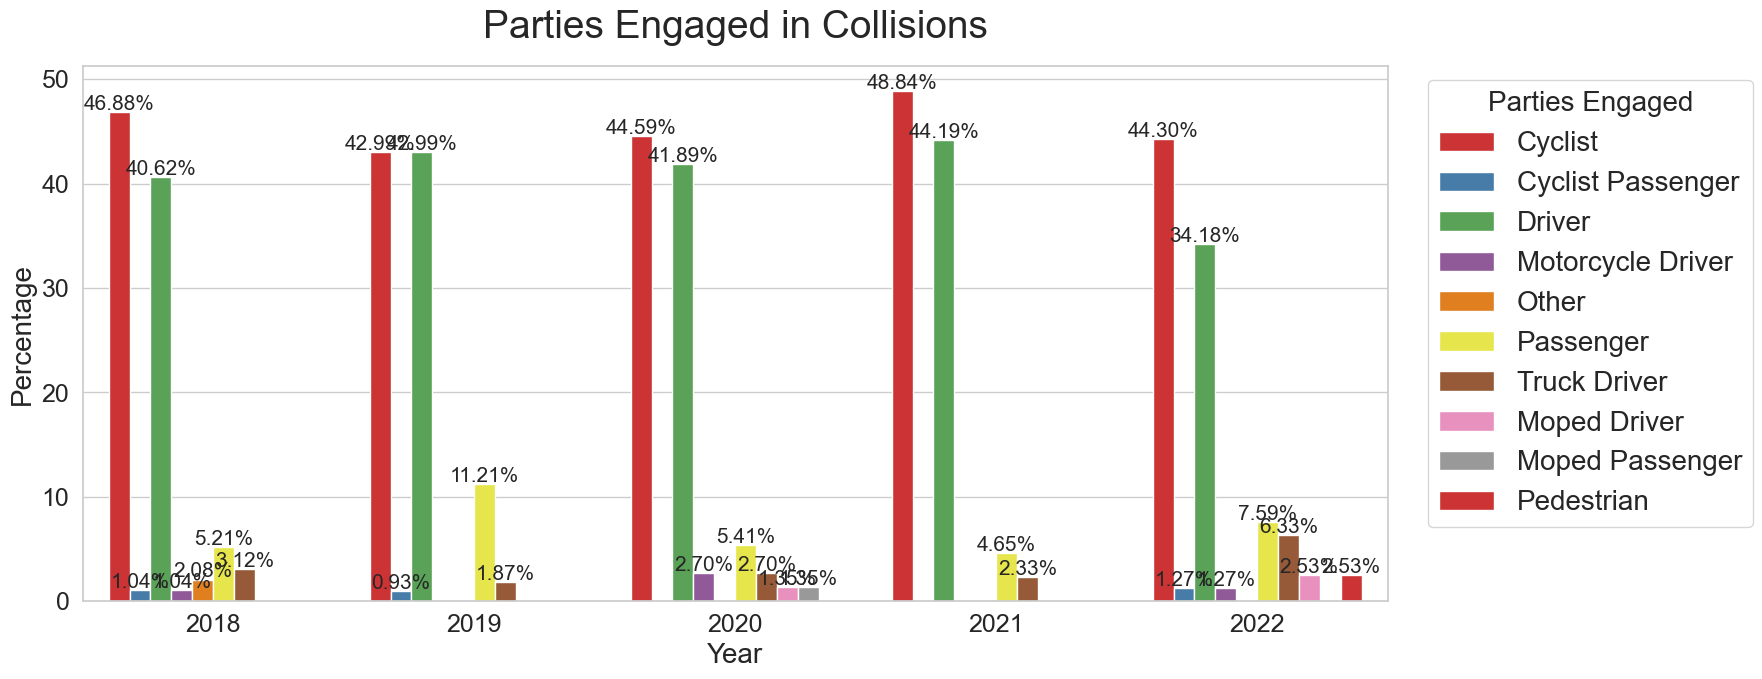

In [456]:

plt.figure(figsize=(15, 15))
ax = sns.barplot(data=collision_year, x='year', y='percentage', hue='INVTYPE', palette='Set1', ci=None)

spacing = 0.2  # Adjust this spacing factor as needed
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height + spacing),
                ha='center', fontsize=15)

# Title and labels
plt.title('Parties Engaged in Collisions', fontsize=28, pad = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Percentage', fontsize=20)

plt.gca().set_aspect(0.04) 
plt.legend(title='Parties Engaged', bbox_to_anchor=(1.02, 1), loc='upper left', title_fontsize = 20, fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig('/Users/joycechen/Desktop/python figure/percent_invol_type_year.png', bbox_inches='tight', facecolor='white', edgecolor='none', transparent=True)

Percentage of region (where the collision happened) by year

In [27]:
collision_reg = collision_gdf
collision_reg['year'] = collision_gdf['DATE'].dt.year
collision_reg = collision_reg.groupby(['year','DISTRICT']).agg({'INDEX_':'count'}).reset_index()
collision_reg['percentage'] = collision_reg.groupby('year')['INDEX_'].transform(lambda x: x / x.sum() * 100)
#collision_year['percentage'] = 100*collision_year['INDEX_']/collision_year['INDEX_'].sum()
collision_reg

,year,DISTRICT,INDEX_,percentage
0,2018,Etobicoke York,16,16.666667
1,2018,North York,18,18.750000
2,2018,Scarborough,15,15.625000
3,2018,Toronto and East York,47,48.958333
4,2019,Etobicoke York,19,17.757009
5,2019,North York,15,14.018692
6,2019,Scarborough,11,10.280374
7,2019,Toronto and East York,62,57.943925
8,2020,Etobicoke York,21,28.378378
9,2020,North York,15,20.270270


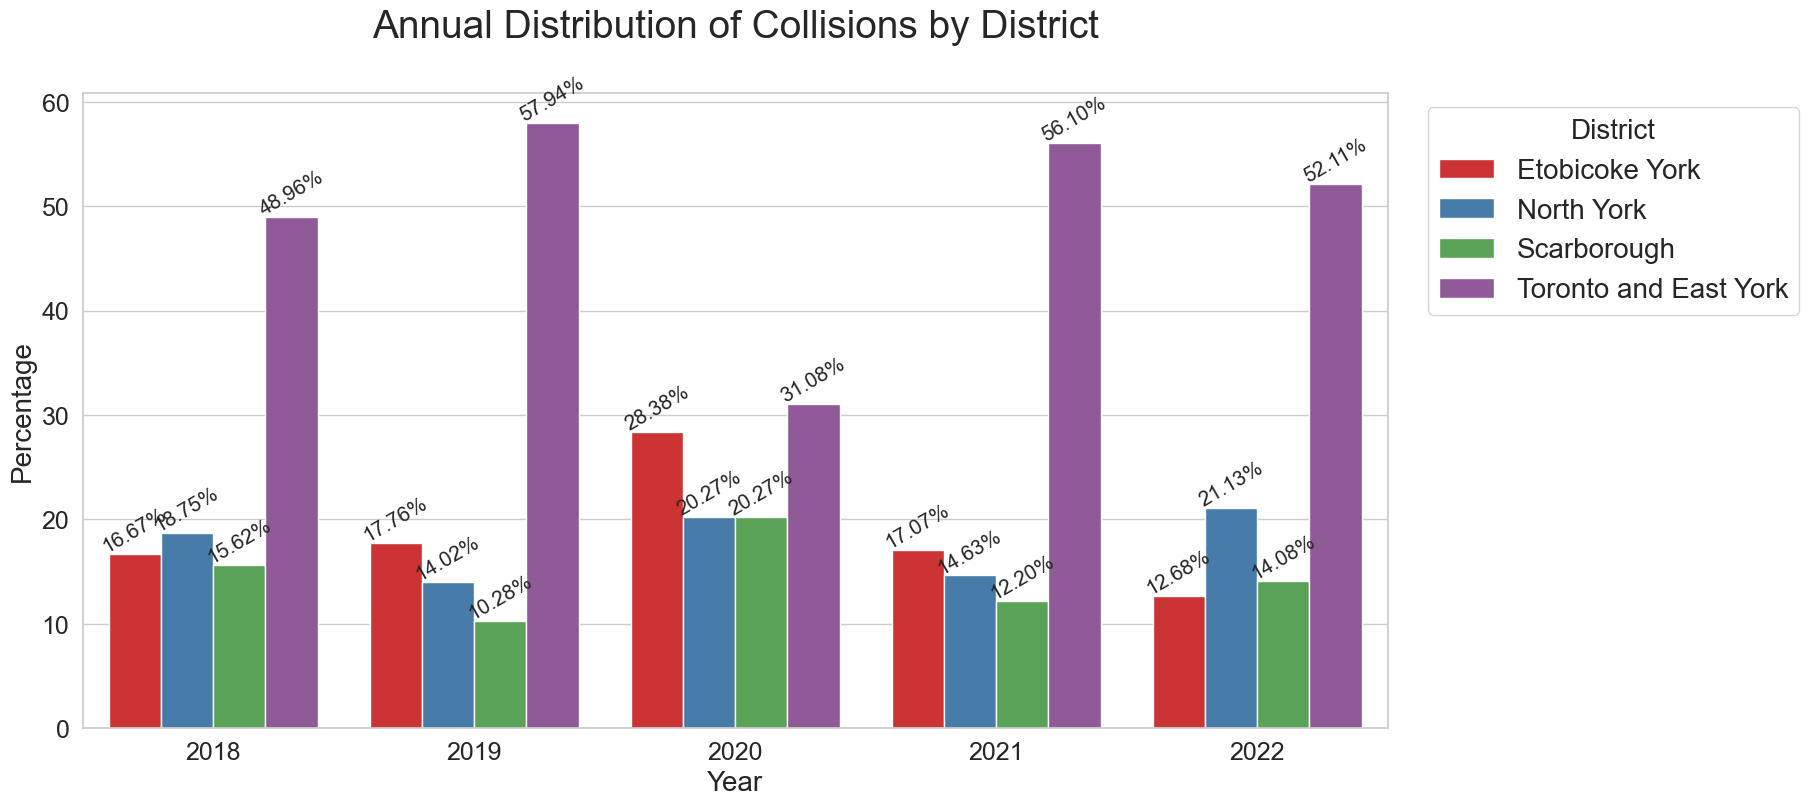

In [460]:
# Your updated barplot code
plt.figure(figsize=(15, 15))
ax = sns.barplot(data=collision_reg, x='year', y='percentage', hue='DISTRICT', palette='Set1')

# Adding data labels with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height + 0.2),
                ha='center', fontsize=15, rotation=30)


# Title and labels
plt.title('Annual Distribution of Collisions by District', fontsize=28, pad = 40)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Percentage', fontsize=20)

# Set the aspect ratio to control the width of bars
plt.gca().set_aspect(0.04) 

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
# Moving legend outside the plot
plt.legend(title='District', bbox_to_anchor=(1.02, 1), loc='upper left',title_fontsize = 20, fontsize = 20)

plt.savefig('/Users/joycechen/Desktop/python figure/percent_district.png', bbox_inches='tight', facecolor='white', edgecolor='none', transparent=True)

neighbourhood profile dataset

In [239]:
neighbourhoods_profile = pd.read_excel('neighbourhood-profiles-2021-158-model.xlsx')
neighbourhoods_profile = neighbourhoods_profile.transpose()
neighbourhoods_profile.columns = neighbourhoods_profile.iloc[0]
neighbourhoods_profile = neighbourhoods_profile[1:] # Exclude the first row which is now the column names
neighbourhoods_profile.head()

Neighbourhood Name,Neighbourhood Number,TSNS 2020 Designation,Total - Age groups of the population - 25% sample data,0 to 14 years,0 to 4 years,5 to 9 years,10 to 14 years,15 to 64 years,15 to 19 years,20 to 24 years,...,Between 9 a.m. and 11:59 a.m.,Between 12 p.m. and 4:59 a.m.,Total - Eligibility for instruction in the minority official language for the population in private households born in 2003 or later - 25% sample data,Children eligible for instruction in the minority official language,Children not eligible for instruction in the minority official language,"Total - Eligibility and instruction in the minority official language, for the population in private households born between 2003 and 2015 (inclusive) - 25% sample data",Children eligible for instruction in the minority official language,Eligible children who have been instructed in the minority official language at the primary or secondary level in Canada,Eligible children who have not been instructed in the minority official language at the primary or secondary level in Canada,Children not eligible for instruction in the minority official language
West Humber-Clairville,1,Not an NIA or Emerging Neighbourhood,33300,4295,1460,1345,1485,23640,1860,3175,...,1665,2935,5430,410,5020,3875,335,255,75,3540
Mount Olive-Silverstone-Jamestown,2,Neighbourhood Improvement Area,31345,5690,1650,1860,2175,21490,2280,2675,...,1145,2965,7285,510,6780,5540,395,245,145,5145
Thistletown-Beaumond Heights,3,Neighbourhood Improvement Area,9850,1495,505,540,455,6615,570,745,...,395,635,1860,180,1685,1325,120,75,45,1205
Rexdale-Kipling,4,Not an NIA or Emerging Neighbourhood,10375,1575,505,615,455,6950,515,715,...,425,775,1910,135,1770,1370,90,75,25,1275
Elms-Old Rexdale,5,Neighbourhood Improvement Area,9355,1610,440,480,685,6355,635,685,...,355,675,2015,95,1920,1520,70,60,10,1445


In [240]:
neighbourhoods_population = neighbourhoods_profile['Total - Age groups of the population - 25% sample data'].reset_index()
neighbourhoods_population = neighbourhoods_population.rename(columns = {'Total - Age groups of the population - 25% sample data': '0.25 total','index':'name'})
neighbourhoods_population['population'] = neighbourhoods_population['0.25 total'] *4
neighbourhoods_population.head()

,name,0.25 total,population
0,West Humber-Clairville,33300,133200
1,Mount Olive-Silverstone-Jamestown,31345,125380
2,Thistletown-Beaumond Heights,9850,39400
3,Rexdale-Kipling,10375,41500
4,Elms-Old Rexdale,9355,37420


In [241]:
neighbourhoods['area'] = neighbourhoods.geometry.area #this is in m^2
neighbourhoods['area'] = neighbourhoods['area']*1e-6 #now it's in km^2
#merge
neighbourhoods_joined = pd.merge(neighbourhoods, neighbourhoods_population, on = 'name')

neighbourhoods_joined.head()

,geometry,name,area,0.25 total,population
0,"POLYGON ((626071.503 4837537.756, 626151.708 4...",Wychwood,1.682042,12800,51200
1,"POLYGON ((628032.302 4840233.689, 628139.346 4...",Yonge-Eglinton,1.650421,12410,49640
2,"POLYGON ((620320.085 4846288.688, 620352.534 4...",York University Heights,13.246739,28255,113020
3,"POLYGON ((625714.291 4840359.316, 625680.263 4...",Yorkdale-Glen Park,6.038310,16625,66500
4,"POLYGON ((620495.604 4835507.586, 620475.621 4...",Lambton Baby Point,1.781869,7965,31860


population density : 

In [242]:
neighbourhoods_joined = neighbourhoods_joined.reset_index()
neighbourhoods_joined.head()

,index,geometry,name,area,0.25 total,population
0,0,"POLYGON ((626071.503 4837537.756, 626151.708 4...",Wychwood,1.682042,12800,51200
1,1,"POLYGON ((628032.302 4840233.689, 628139.346 4...",Yonge-Eglinton,1.650421,12410,49640
2,2,"POLYGON ((620320.085 4846288.688, 620352.534 4...",York University Heights,13.246739,28255,113020
3,3,"POLYGON ((625714.291 4840359.316, 625680.263 4...",Yorkdale-Glen Park,6.038310,16625,66500
4,4,"POLYGON ((620495.604 4835507.586, 620475.621 4...",Lambton Baby Point,1.781869,7965,31860


In [366]:
neighbourhoods_joined['population'] = neighbourhoods_joined['population'].astype(int)
neighbourhoods_joined['population density'] = neighbourhoods_joined['population']/neighbourhoods_joined['area']

neighbourhoods_joined.head()

,index,geometry,name,area,0.25 total,population,population density
0,0,"POLYGON ((626071.503 4837537.756, 626151.708 4...",Wychwood,1.682042,12800,51200,30439.198240
1,1,"POLYGON ((628032.302 4840233.689, 628139.346 4...",Yonge-Eglinton,1.650421,12410,49640,30077.171126
2,2,"POLYGON ((620320.085 4846288.688, 620352.534 4...",York University Heights,13.246739,28255,113020,8531.911435
3,3,"POLYGON ((625714.291 4840359.316, 625680.263 4...",Yorkdale-Glen Park,6.038310,16625,66500,11013.015611
4,4,"POLYGON ((620495.604 4835507.586, 620475.621 4...",Lambton Baby Point,1.781869,7965,31860,17880.103599


Number of collisions in each neighbourhood:
1. which region does collision happen the most?
2. compare number of collisions with population density

In [281]:
collision_gdf.head()
col_neighbour = collision_gdf[['NEIGHBOURH', 'INDEX_', 'INVTYPE']]

neighbourhoods_collision = pd.merge(neighbourhoods_joined, col_neighbour, left_on = 'name', right_on = 'NEIGHBOURH')

col_count_neighbour = neighbourhoods_collision.groupby(['name','geometry']).agg({'INDEX_':'count', 'population density':'max'}).sort_values('INDEX_', ascending = False)
col_count_neighbour[0:10]


,,INDEX_,population density
name,geometry,,
South Riverdale,"POLYGON ((634788.020 4834074.432, 634789.475 4...",19,10147.107287
Moss Park,"POLYGON ((632910.604 4834938.350, 632883.548 4...",17,60833.909696
Kensington-Chinatown,"POLYGON ((628713.653 4833925.535, 628698.164 4...",14,47230.318449
Dufferin Grove,"POLYGON ((624994.979 4834931.307, 625012.568 4...",14,32320.651200
Milliken,"POLYGON ((641302.472 4852600.387, 641202.087 4...",11,10120.281772
Trinity-Bellwoods,"POLYGON ((627237.529 4833486.591, 627225.791 4...",9,35649.431015
York University Heights,"POLYGON ((620320.085 4846288.688, 620352.534 4...",8,8531.911435
Wychwood,"POLYGON ((626071.503 4837537.756, 626151.708 4...",8,30439.198240
Palmerston-Little Italy,"POLYGON ((626894.128 4834603.189, 626805.400 4...",8,36564.932673


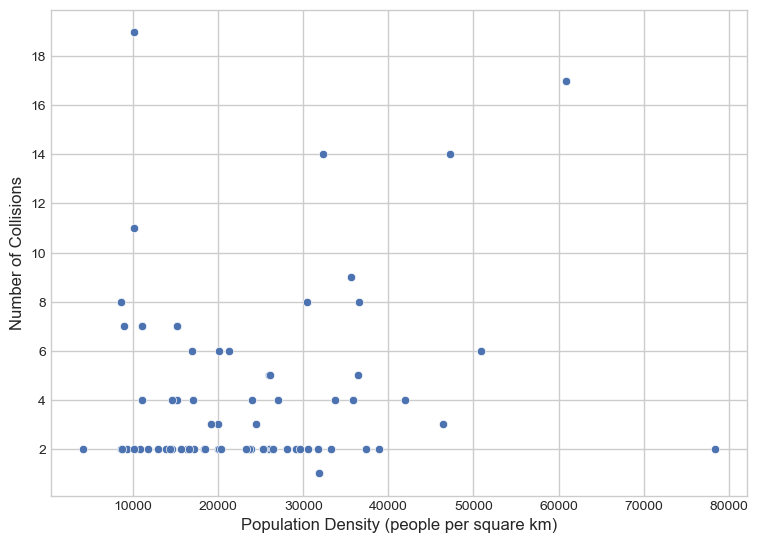

In [349]:
import random
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 6))  # Set the figure size

# Create the scatterplot
scatter = sns.scatterplot(col_count_neighbour, x = 'population density', y ='INDEX_',hue = '')


# Set axis labels and title
plt.xlabel('Population Density (people per square km)', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
# Adjust ticks font size
scatter.tick_params(labelsize=10)

Heat map

In [187]:
import folium

In [188]:
from folium.plugins import HeatMap

In [194]:
# Create a map of Toronto
map_5 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=11)

# Add points to the map
HeatMap(data=list(zip(collision_gdf.to_crs(epsg=4326).geometry.y,
                      collision_gdf.to_crs(epsg=4326).geometry.x)),
        radius=20).add_to(map_5)

# Display map
map_5
#save
map_5.save("/Users/joycechen/Desktop/python figure/heatmap_all_collision.html")

Weekday vs weekends

In [102]:
import datetime as dt

In [107]:
collision_gdf.head()
collision_gdf['DATE'] = pd.to_datetime(collision_gdf['DATE'], format='%Y-%m-%d')


#true for weekends false for weekdays
collision_gdf['if_weekends'] = collision_gdf['DATE'].apply(lambda x: x.dayofweek >= 5)

collision_gdf.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,NEIGHBOURH,HOOD_140,NEIGHBOU_1,DIVISION,ObjectId,geometry,month,year,percentage,if_weekends
1001,80923405,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,Westminster-Branson,35,Westminster-Branson (35),D32,1002,POINT (-8844666.500 5433115.618),1,2018,24.997804,False
1002,80923406,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,Westminster-Branson,35,Westminster-Branson (35),D32,1003,POINT (-8844666.500 5433115.618),1,2018,24.997804,False
1003,80937623,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,Leaside-Bennington,56,Leaside-Bennington (56),D53,1004,POINT (-8834934.394 5419362.224),1,2018,25.002196,False
1004,80937624,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,Leaside-Bennington,56,Leaside-Bennington (56),D53,1005,POINT (-8834934.394 5419362.224),1,2018,25.002196,False
1005,80926724,None,2018,2018-02-03,1525,8 HERTFORD AVE,None,30 m North of,Local,Etobicoke York,...,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,1006,POINT (-8847375.794 5417393.496),2,2018,49.819104,True


In [108]:
weekdays_light_cond = collision_gdf.groupby(['LIGHT', 'if_weekends']).agg({'INDEX_':'count'})
weekdays_light_cond = weekdays_light_cond.reset_index()
weekdays_light_cond['percentage'] = weekdays_light_cond.groupby('LIGHT')['INDEX_'].transform(lambda x: x / x.sum() * 100)
weekdays_light_cond

,LIGHT,if_weekends,INDEX_,percentage
0,Dark,False,8,61.538462
1,Dark,True,5,38.461538
2,"Dark, artificial",False,57,71.250000
3,"Dark, artificial",True,23,28.750000
4,Dawn,False,2,100.000000
5,"Dawn, artificial",False,2,100.000000
6,Daylight,False,195,73.863636
7,Daylight,True,69,26.136364
8,"Daylight, artificial",False,8,57.142857
9,"Daylight, artificial",True,6,42.857143


In [181]:
weekdays_light_cond.columns

Index(['LIGHT', 'if_weekends', 'INDEX_'], dtype='object')

<Figure size 1500x1500 with 0 Axes>

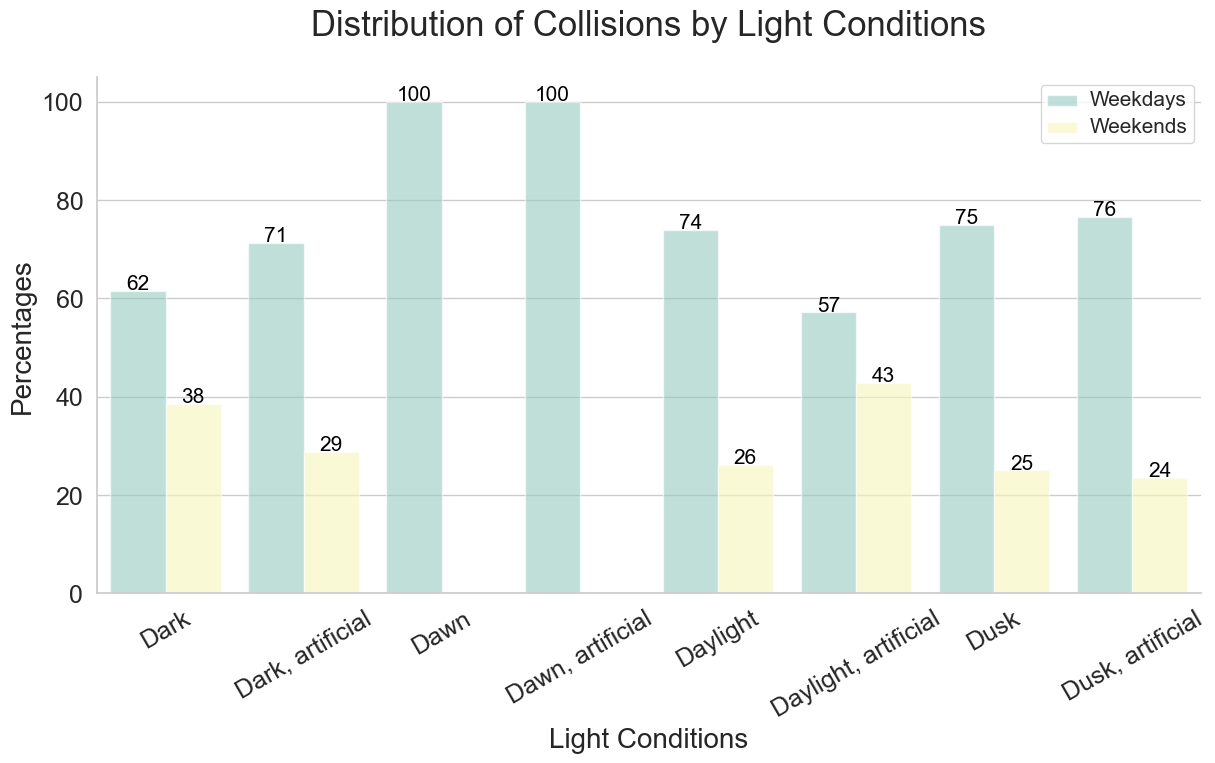

In [467]:
#plot the figure
plt.figure(figsize=(15, 15))
plt.gcf().set_facecolor('#f0f0f0')  # Set the background color (in this case, a light gray)

k = sns.catplot(
    data=weekdays_light_cond, kind="bar",
    x="LIGHT", y="percentage", hue="if_weekends",
    errorbar="sd", palette="Set3", alpha=.6, height=6, legend = False, aspect = 2)
plt.title('Distribution of Collisions by Light Conditions', fontsize=25, pad = 30)

plt.xlabel('Light Conditions',fontsize=20 )
plt.ylabel('Percentages', fontsize=20)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=18)

new_labels = ['Weekdays', 'Weekends']
legend = k.ax.legend()
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)
    text.set_fontsize(15)

for p in k.ax.patches:
    k.ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                  textcoords='offset points')

plt.savefig('/Users/joycechen/Desktop/python figure/collision_weekdays.png', bbox_inches = 'tight', facecolor = 'white')

collision with whom?

In [189]:
collision_gdf.head() #INVTYPE

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,DISABILITY,HOOD_158,NEIGHBOURH,HOOD_140,NEIGHBOU_1,DIVISION,ObjectId,geometry,day_name,if_weekends
1001,80923405,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1002,POINT (-8844666.500 5433115.618),0,False
1002,80923406,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1003,POINT (-8844666.500 5433115.618),0,False
1003,80937623,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1004,POINT (-8834934.394 5419362.224),0,False
1004,80937624,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1005,POINT (-8834934.394 5419362.224),0,False
1005,80926724,None,2018,2018-02-03,1525,8 HERTFORD AVE,None,30 m North of,Local,Etobicoke York,...,None,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,1006,POINT (-8847375.794 5417393.496),5,True


In [191]:
 collision_gdf['INVTYPE'].unique()

array(['Cyclist', 'Driver', 'Other', 'Truck Driver', 'Passenger',
       'Motorcycle Driver', 'Cyclist Passenger', 'Moped Driver',
       'Pedestrian', None, 'Moped Passenger'], dtype=object)

In [202]:
role_of_person = collision_gdf.groupby(['NEIGHBOURH','INVTYPE']).agg({'INDEX_':'count'}).reset_index()
role_of_person.head(10)

,NEIGHBOURH,INVTYPE,INDEX_
0,Agincourt North,Cyclist,2
1,Agincourt North,Driver,2
2,Alderwood,Cyclist,1
3,Alderwood,Driver,1
4,Annex,Cyclist,2
5,Annex,Driver,2
6,Banbury-Don Mills,Cyclist,1
7,Banbury-Don Mills,Driver,1
8,Bay-Cloverhill,Cyclist,3
9,Bay-Cloverhill,Driver,2


In [204]:
role_of_person['INVTYPE'].unique()


array(['Cyclist', 'Driver', 'Truck Driver', 'Motorcycle Driver',
       'Passenger', 'Moped Driver', 'Cyclist Passenger',
       'Moped Passenger', 'Other', 'Pedestrian'], dtype=object)

In [291]:
driver = role_of_person[role_of_person['INVTYPE'].str.contains('Driver|Truck Driver')].groupby('NEIGHBOURH').agg({'INDEX_':'sum'}).sort_values('INDEX_', ascending = False)

driver = pd.merge(neighbourhoods_joined, driver, left_on = 'name', right_on = 'NEIGHBOURH', how = 'right')
driver


,index,geometry,name,area,0.25 total,population,population density,INDEX_
0,40.0,"POLYGON ((634788.020 4834074.432, 634789.475 4...",South Riverdale,10.964701,27815,111260.0,10147.107287,8
1,15.0,"POLYGON ((632910.604 4834938.350, 632883.548 4...",Moss Park,1.413028,21490,85960.0,60833.909696,8
2,87.0,"POLYGON ((624994.979 4834931.307, 625012.568 4...",Dufferin Grove,1.387967,11215,44860.0,32320.651200,7
3,113.0,"POLYGON ((628713.653 4833925.535, 628698.164 4...",Kensington-Chinatown,1.534607,18120,72480.0,47230.318449,6
4,13.0,"POLYGON ((641302.472 4852600.387, 641202.087 4...",Milliken,9.477997,23980,95920.0,10120.281772,5
...,...,...,...,...,...,...,...,...
88,25.0,"POLYGON ((632908.788 4839809.498, 632920.557 4...",Old East York,2.349873,9160,36640.0,15592.333701,1
89,85.0,"POLYGON ((631656.717 4847810.705, 631657.931 4...",Don Valley Village,4.212380,26775,107100.0,25425.059125,1
90,30.0,"POLYGON ((618803.870 4834158.314, 618797.029 4...",Princess-Rosethorn,5.171362,11170,44680.0,8639.889715,1
91,31.0,"POLYGON ((632697.229 4835190.362, 632679.479 4...",Regent Park,0.650278,12750,51000.0,78427.974098,1


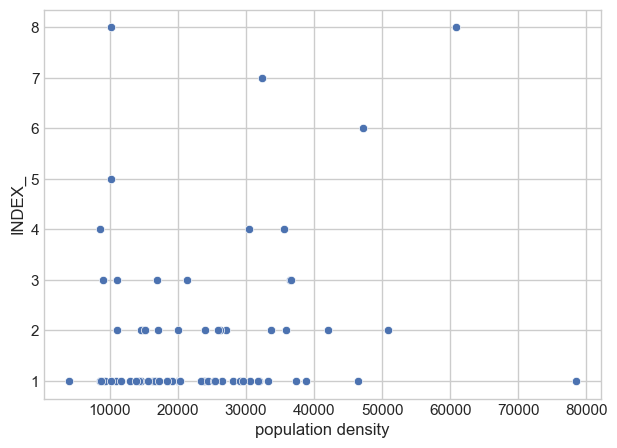

In [292]:
sns.scatterplot(data = driver, x = 'population density', y='INDEX_')
plt.show()

high population density and high number of driver collisions

In [298]:
driver_high = driver.loc[driver['population density'] >20000]
driver_high = driver_high.loc[driver_high['INDEX_'] >2]
driver_high.head()


,index,geometry,name,area,0.25 total,population,population density,INDEX_
1,15.0,"POLYGON ((632910.604 4834938.350, 632883.548 4...",Moss Park,1.413028,21490,85960.0,60833.909696,8
2,87.0,"POLYGON ((624994.979 4834931.307, 625012.568 4...",Dufferin Grove,1.387967,11215,44860.0,32320.651200,7
3,113.0,"POLYGON ((628713.653 4833925.535, 628698.164 4...",Kensington-Chinatown,1.534607,18120,72480.0,47230.318449,6
7,48.0,"POLYGON ((627237.529 4833486.591, 627225.791 4...",Trinity-Bellwoods,1.729621,15415,61660.0,35649.431015,4
8,0.0,"POLYGON ((626071.503 4837537.756, 626151.708 4...",Wychwood,1.682042,12800,51200.0,30439.198240,4


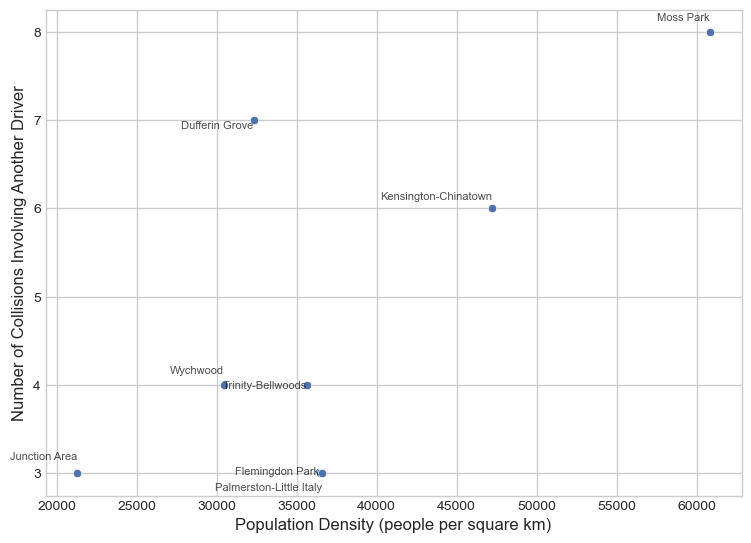

In [299]:
import random
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 6))  # Set the figure size

# Create the scatterplot
scatter = sns.scatterplot(data=driver_high, x='population density', y='INDEX_')

for index, row in driver_high.iterrows():
    # Adding random offsets to the text positions to avoid overlaps
    offset_x = random.uniform(-0.2, 0.2)  # Adjust these values as needed
    offset_y = random.uniform(-0.2, 0.2)  # Adjust these values as needed
    plt.text(row['population density'] + offset_x, row['INDEX_'] + offset_y, row['name'],
             ha='right', fontsize=8, color='black', alpha=0.7)  # Adjust alpha for transparency

# Set axis labels and title
plt.xlabel('Population Density (people per square km)', fontsize=12)
plt.ylabel('Number of Collisions Involving Another Driver', fontsize=12)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
# Adjust ticks font size
scatter.tick_params(labelsize=10)



In [336]:

collision_gdf.dropna(subset=['INVTYPE'], inplace=True)  # Drop rows with NaN in 'INVTYPE' column
auto = collision_gdf[collision_gdf['INVTYPE'].str.contains('Driver|Truck Driver')]
auto = gpd.GeoDataFrame(data = auto, geometry = gpd.points_from_xy(auto['LONGITUDE'],auto['LATITUDE'])) 

auto.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,DISABILITY,HOOD_158,NEIGHBOURH,HOOD_140,NEIGHBOU_1,DIVISION,ObjectId,geometry,day_name,if_weekends
1002,80923406,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1003,POINT (-79.453 43.791),0,False
1003,80937623,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1004,POINT (-79.366 43.701),0,False
1007,80913986,None,2018,2018-04-13,1918,THE WESTWAY,KIPLING AVE,11 m South of,Major Arterial,Etobicoke York,...,None,7,Willowridge-Martingrove-Richview,7,Willowridge-Martingrove-Richview (7),D23,1008,POINT (-79.555 43.686),4,False
1009,80941372,None,2018,2018-05-15,1558,LAKE SHORE BV W,COLBORNE LODGE DR,None,Major Arterial,Toronto and East York,...,None,85,South Parkdale,85,South Parkdale (85),D11,1010,POINT (-79.459 43.638),1,False
1011,80942711,None,2018,2018-05-16,55,QUEEN ST E,JARVIS ST,None,Major Arterial,Toronto and East York,...,None,73,Moss Park,73,Moss Park (73),D51,1012,POINT (-79.373 43.654),2,False


In [337]:
auto.crs = {'init': 'epsg:4326'}
auto = auto.to_crs(epsg = 4326)

In [335]:
type(auto)


geopandas.geodataframe.GeoDataFrame

In [338]:
# Create a map of Toronto
map_6 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)

# Add points to the map
HeatMap(data=list(zip(auto.to_crs(epsg=4326).geometry.y,
                      auto.to_crs(epsg=4326).geometry.x)),
        radius=20).add_to(map_6)


# Display map
map_6
#save
#map_5.save('collision_heat_map.html')

In [306]:
non_car = role_of_person[role_of_person['INVTYPE'].str.contains('Cyclist|Motorcycle Driver|Moped Driver')].groupby('NEIGHBOURH').agg({'INDEX_':'sum'}).sort_values('INDEX_',ascending = False)
non_car = pd.merge(neighbourhoods_joined, non_car, left_on = 'name', right_on = 'NEIGHBOURH', how = 'right')
non_car


,index,geometry,name,area,0.25 total,population,population density,INDEX_
0,40.0,"POLYGON ((634788.020 4834074.432, 634789.475 4...",South Riverdale,10.964701,27815,111260.0,10147.107287,8
1,113.0,"POLYGON ((628713.653 4833925.535, 628698.164 4...",Kensington-Chinatown,1.534607,18120,72480.0,47230.318449,7
2,15.0,"POLYGON ((632910.604 4834938.350, 632883.548 4...",Moss Park,1.413028,21490,85960.0,60833.909696,7
3,NaN,None,NaN,NaN,NaN,NaN,NaN,6
4,87.0,"POLYGON ((624994.979 4834931.307, 625012.568 4...",Dufferin Grove,1.387967,11215,44860.0,32320.651200,6
...,...,...,...,...,...,...,...,...
89,30.0,"POLYGON ((618803.870 4834158.314, 618797.029 4...",Princess-Rosethorn,5.171362,11170,44680.0,8639.889715,1
90,31.0,"POLYGON ((632697.229 4835190.362, 632679.479 4...",Regent Park,0.650278,12750,51000.0,78427.974098,1
91,32.0,"POLYGON ((616395.718 4841245.042, 616402.362 4...",Rexdale-Kipling,2.505653,10375,41500.0,16562.545559,1
92,34.0,"POLYGON ((626772.235 4833346.641, 626737.437 4...",Roncesvalles,1.504505,14610,58440.0,38843.352825,1


In [311]:
non_car = non_car.dropna()
non_car_high = non_car.loc[(non_car['population density'] > 20000) & (non_car['INDEX_'] > 2)]

non_car_high

,index,geometry,name,area,0.25 total,population,population density,INDEX_
1,113.0,"POLYGON ((628713.653 4833925.535, 628698.164 4...",Kensington-Chinatown,1.534607,18120,72480.0,47230.318449,7
2,15.0,"POLYGON ((632910.604 4834938.350, 632883.548 4...",Moss Park,1.413028,21490,85960.0,60833.909696,7
4,87.0,"POLYGON ((624994.979 4834931.307, 625012.568 4...",Dufferin Grove,1.387967,11215,44860.0,32320.651200,6
7,44.0,"POLYGON ((635232.858 4847517.822, 635225.503 4...",Tam O'Shanter-Sullivan,5.422346,27205,108820.0,20068.805609,4
9,26.0,"POLYGON ((626894.128 4834603.189, 626805.400 4...",Palmerston-Little Italy,1.435255,13120,52480.0,36564.932673,4
12,0.0,"POLYGON ((626071.503 4837537.756, 626151.708 4...",Wychwood,1.682042,12800,51200.0,30439.198240,4
13,48.0,"POLYGON ((627237.529 4833486.591, 627225.791 4...",Trinity-Bellwoods,1.729621,15415,61660.0,35649.431015,4
19,110.0,"POLYGON ((622333.309 4835987.876, 622325.716 4...",Junction Area,2.631828,14010,56040.0,21293.181168,3
21,77.0,"POLYGON ((624110.361 4837657.166, 624091.125 4...",Caledonia-Fairbank,1.544422,10015,40060.0,25938.508875,3


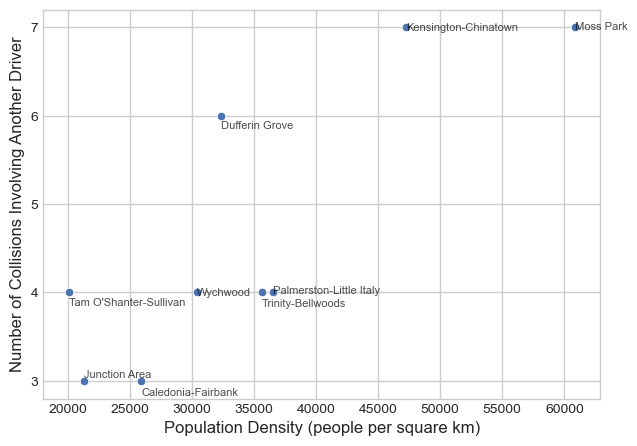

In [314]:
sns.scatterplot(data = non_car_high, x = 'population density', y='INDEX_')
for index, row in non_car_high.iterrows():
    # Adding random offsets to the text positions to avoid overlaps
    offset_x = random.uniform(-0.2, 0.2)  # Adjust these values as needed
    offset_y = random.uniform(-0.2, 0.2)  # Adjust these values as needed
    plt.text(row['population density'] + offset_x, row['INDEX_'] + offset_y, row['name'],
             ha='left', fontsize=8, color='black', alpha=0.7)  # Adjust alpha for transparency

# Set axis labels and title
plt.xlabel('Population Density (people per square km)', fontsize=12)
plt.ylabel('Number of Collisions Involving Another Driver', fontsize=12)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
# Adjust ticks font size
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [345]:
non_auto = collision_gdf.dropna(subset=['INVTYPE']) # Drop rows with NaN in 'INVTYPE' column
non_auto = collision_gdf[collision_gdf['INVTYPE'].str.contains('Cyclist|Motorcycle Driver|Moped Driver')]
non_auto = gpd.GeoDataFrame(data=non_auto, geometry=gpd.points_from_xy(non_auto['LONGITUDE'], non_auto['LATITUDE']))

non_auto.crs = {'init': 'epsg:4326'}
non_auto = auto.to_crs(epsg = 4326)


#save

In [346]:
# Create a map of Toronto
map_7 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)

# Add points to the map
HeatMap(data=list(zip(non_auto.to_crs(epsg=4326).geometry.y,
                      non_auto.to_crs(epsg=4326).geometry.x)),
        radius=20).add_to(map_7)


# Display map
map_7

In [272]:
#income = neighbourhoods_profile['Average total income in 2020 among recipients ($)'].reset_index()
income = neighbourhoods_profile.iloc[:, [0,64]]
income = income.rename(columns = {'index':'name','    Average total income in 2020 among recipients ($)':'average total income'})
income.head()

Neighbourhood Name,name,average total income
0,West Humber-Clairville,40560
1,Mount Olive-Silverstone-Jamestown,35000
2,Thistletown-Beaumond Heights,41520
3,Rexdale-Kipling,42040
4,Elms-Old Rexdale,41240


In [278]:
collision_income = pd.merge(col_count_neighbour,income,on = 'name', how = 'left').sort_values('INDEX_', ascending = False)
collision_income

,name,INDEX_,average total income
0,South Riverdale,19,74100
1,Moss Park,17,66800
2,Kensington-Chinatown,14,53750
3,Dufferin Grove,14,54900
4,Milliken,11,36800
...,...,...,...
46,Woodbine Corridor,2,72100
47,Woodbine-Lumsden,2,61550
48,Banbury-Don Mills,2,77800
49,Humewood-Cedarvale,2,81100


<Axes: xlabel='average total income', ylabel='INDEX_'>

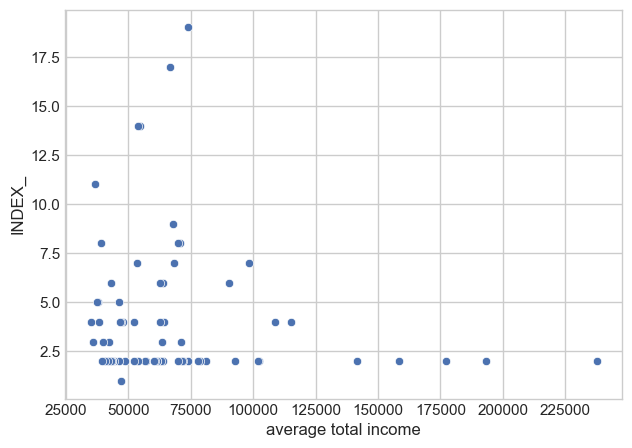

In [277]:
sns.scatterplot(collision_income, x = 'average total income', y ='INDEX_')

Create a buffer

In [81]:
collision_gdf.to_crs(epsg = 26917)

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURH,HOOD_140,NEIGHBOU_1,DIVISION,ObjectId,geometry,year
1001,80923405,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1002,POINT (624465.831 4849794.187),2018
1002,80923406,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1003,POINT (624465.831 4849794.187),2018
1003,80937623,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1004,POINT (631695.343 4840016.490),2018
1004,80937624,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1005,POINT (631695.343 4840016.490),2018
1005,80926724,None,2018,2018-02-03,1525,8 HERTFORD AVE,None,30 m North of,Local,Etobicoke York,...,None,None,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,1006,POINT (622715.959 4838424.856),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,81453369,None,2019,2019-12-13,1653,BLOOR ST W,ABERFOYLE CRES,None,Major Arterial,Etobicoke York,...,None,None,16,Stonegate-Queensway,16,Stonegate-Queensway (16),D22,1892,POINT (619447.934 4833576.638),2019
1892,81703588,2002473250,2022,2022-12-18,2228,LAKE SHORE BLVD E,LOWER JARVIS ST,1 m West of,Major Arterial,Toronto and East York,...,None,None,166,St Lawrence-East Bayfront-The Islands,77,Waterfront Communities-The Island (77),D51,1893,POINT (631477.017 4833792.446),2022
1893,81453370,None,2019,2019-12-13,1653,BLOOR ST W,ABERFOYLE CRES,None,Major Arterial,Etobicoke York,...,None,None,16,Stonegate-Queensway,16,Stonegate-Queensway (16),D22,1894,POINT (619447.934 4833576.638),2019
1894,81703589,2002473250,2022,2022-12-18,2228,LAKE SHORE BLVD E,LOWER JARVIS ST,1 m West of,Major Arterial,Toronto and East York,...,None,None,166,St Lawrence-East Bayfront-The Islands,77,Waterfront Communities-The Island (77),D51,1895,POINT (631477.017 4833792.446),2022


In [121]:
collision_buffer = collision_gdf.buffer(500)
collision_buffer.head()

1001    POLYGON ((-8844166.500 5433115.618, -8844168.9...
1002    POLYGON ((-8844166.500 5433115.618, -8844168.9...
1003    POLYGON ((-8834434.394 5419362.224, -8834436.8...
1004    POLYGON ((-8834434.394 5419362.224, -8834436.8...
1005    POLYGON ((-8846875.794 5417393.496, -8846878.2...
dtype: geometry

In [222]:
from folium import GeoJson

In [120]:
map_8 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)
    
# Plot each polygon on the map
GeoJson(collision_buffer.to_crs(epsg=4326)).add_to(map_8)

# Show the map
map_8


In [90]:
neighbourhoods_profile.head()

Neighbourhood Name,Neighbourhood Number,TSNS 2020 Designation,Total - Age groups of the population - 25% sample data,0 to 14 years,0 to 4 years,5 to 9 years,10 to 14 years,15 to 64 years,15 to 19 years,20 to 24 years,...,Between 9 a.m. and 11:59 a.m.,Between 12 p.m. and 4:59 a.m.,Total - Eligibility for instruction in the minority official language for the population in private households born in 2003 or later - 25% sample data,Children eligible for instruction in the minority official language,Children not eligible for instruction in the minority official language,"Total - Eligibility and instruction in the minority official language, for the population in private households born between 2003 and 2015 (inclusive) - 25% sample data",Children eligible for instruction in the minority official language,Eligible children who have been instructed in the minority official language at the primary or secondary level in Canada,Eligible children who have not been instructed in the minority official language at the primary or secondary level in Canada,Children not eligible for instruction in the minority official language
West Humber-Clairville,1,Not an NIA or Emerging Neighbourhood,33300,4295,1460,1345,1485,23640,1860,3175,...,1665,2935,5430,410,5020,3875,335,255,75,3540
Mount Olive-Silverstone-Jamestown,2,Neighbourhood Improvement Area,31345,5690,1650,1860,2175,21490,2280,2675,...,1145,2965,7285,510,6780,5540,395,245,145,5145
Thistletown-Beaumond Heights,3,Neighbourhood Improvement Area,9850,1495,505,540,455,6615,570,745,...,395,635,1860,180,1685,1325,120,75,45,1205
Rexdale-Kipling,4,Not an NIA or Emerging Neighbourhood,10375,1575,505,615,455,6950,515,715,...,425,775,1910,135,1770,1370,90,75,25,1275
Elms-Old Rexdale,5,Neighbourhood Improvement Area,9355,1610,440,480,685,6355,635,685,...,355,675,2015,95,1920,1520,70,60,10,1445


In [91]:
collision_gdf.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURH,HOOD_140,NEIGHBOU_1,DIVISION,ObjectId,geometry,year
1001,80923405,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1002,POINT (-8844666.500 5433115.618),2018
1002,80923406,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1003,POINT (-8844666.500 5433115.618),2018
1003,80937623,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1004,POINT (-8834934.394 5419362.224),2018
1004,80937624,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1005,POINT (-8834934.394 5419362.224),2018
1005,80926724,None,2018,2018-02-03,1525,8 HERTFORD AVE,None,30 m North of,Local,Etobicoke York,...,None,None,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,1006,POINT (-8847375.794 5417393.496),2018


In [113]:
collision_age = collision_gdf

collision_age = collision_age.groupby(['INVAGE']).agg({'INDEX_': 'count'}).reset_index().sort_values('INVAGE')

collision_age['INVAGE'] = collision_age['INVAGE'].replace({'0 to 4': 'less than 10','5 to 9': 'less than 10'})
collision_age = collision_age.groupby('INVAGE').sum('INDEX_').reset_index().sort_values('INVAGE',ascending = False)
collision_age

,INVAGE,INDEX_
16,unknown,20
15,less than 10,2
14,80 to 84,8
13,75 to 79,7
12,70 to 74,8
11,65 to 69,18
10,60 to 64,27
9,55 to 59,34
8,50 to 54,30
7,45 to 49,30


In [365]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=collision_age, x='INVAGE', y='INDEX_', color = 'green')
plt.title('Number of collisions by age group', fontsize=18)
plt.xlabel('Age groups', fontsize=16)
plt.ylabel('Number of collisions', fontsize=16)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)

plt.show()

NameError: name 'collision_age' is not defined

<Figure size 1000x600 with 0 Axes>

Neighbourhood interactive map

In [282]:
col_count_neighbour = col_count_neighbour.reset_index()

In [299]:

col_count_neighbour = pd.merge(col_count_neighbour, neighbourhoods, how = 'outer', on = 'name')
col_count_neighbour['name'] = col_count_neighbour['name'].unique()
col_count_neighbour.head(10)

,name,geometry_x,INDEX_,population density,geometry_y,area_x,geometry,area_y
0,South Riverdale,"POLYGON ((634788.020 4834074.432, 634789.475 4...",19.0,10147.107287,"POLYGON ((634788.020 4834074.432, 634789.475 4...",10.964701,"POLYGON ((634788.020 4834074.432, 634789.475 4...",10.964701
1,Moss Park,"POLYGON ((632910.604 4834938.350, 632883.548 4...",17.0,60833.909696,"POLYGON ((632910.604 4834938.350, 632883.548 4...",1.413028,"POLYGON ((632910.604 4834938.350, 632883.548 4...",1.413028
2,Kensington-Chinatown,"POLYGON ((628713.653 4833925.535, 628698.164 4...",14.0,47230.318449,"POLYGON ((628713.653 4833925.535, 628698.164 4...",1.534607,"POLYGON ((628713.653 4833925.535, 628698.164 4...",1.534607
3,Dufferin Grove,"POLYGON ((624994.979 4834931.307, 625012.568 4...",14.0,32320.651200,"POLYGON ((624994.979 4834931.307, 625012.568 4...",1.387967,"POLYGON ((624994.979 4834931.307, 625012.568 4...",1.387967
4,Milliken,"POLYGON ((641302.472 4852600.387, 641202.087 4...",11.0,10120.281772,"POLYGON ((641302.472 4852600.387, 641202.087 4...",9.477997,"POLYGON ((641302.472 4852600.387, 641202.087 4...",9.477997
5,Trinity-Bellwoods,"POLYGON ((627237.529 4833486.591, 627225.791 4...",9.0,35649.431015,"POLYGON ((627237.529 4833486.591, 627225.791 4...",1.729621,"POLYGON ((627237.529 4833486.591, 627225.791 4...",1.729621
6,York University Heights,"POLYGON ((620320.085 4846288.688, 620352.534 4...",8.0,8531.911435,"POLYGON ((620320.085 4846288.688, 620352.534 4...",13.246739,"POLYGON ((620320.085 4846288.688, 620352.534 4...",13.246739
7,Wychwood,"POLYGON ((626071.503 4837537.756, 626151.708 4...",8.0,30439.198240,"POLYGON ((626071.503 4837537.756, 626151.708 4...",1.682042,"POLYGON ((626071.503 4837537.756, 626151.708 4...",1.682042
8,Palmerston-Little Italy,"POLYGON ((626894.128 4834603.189, 626805.400 4...",8.0,36564.932673,"POLYGON ((626894.128 4834603.189, 626805.400 4...",1.435255,"POLYGON ((626894.128 4834603.189, 626805.400 4...",1.435255
9,Cliffcrest,"POLYGON ((642981.492 4841747.476, 642971.583 4...",7.0,8971.587103,"POLYGON ((642981.492 4841747.476, 642971.583 4...",7.191593,"POLYGON ((642981.492 4841747.476, 642971.583 4...",7.191593


In [296]:
col_count = col_count_neighbour[['name','geometry_y','INDEX_']]
col_count['INDEX_'] = col_count['INDEX_'].fillna(0)
col_count_neighbour_gdf = gpd.GeoDataFrame(col_count, geometry='geometry_y')

#set crs 
col_count_neighbour_gdf.crs = {'init': 'epsg:4326'}
col_count_neighbour_gdf = col_count_neighbour_gdf.to_crs(epsg = 4326)


In [341]:
from shapely.geometry import Point

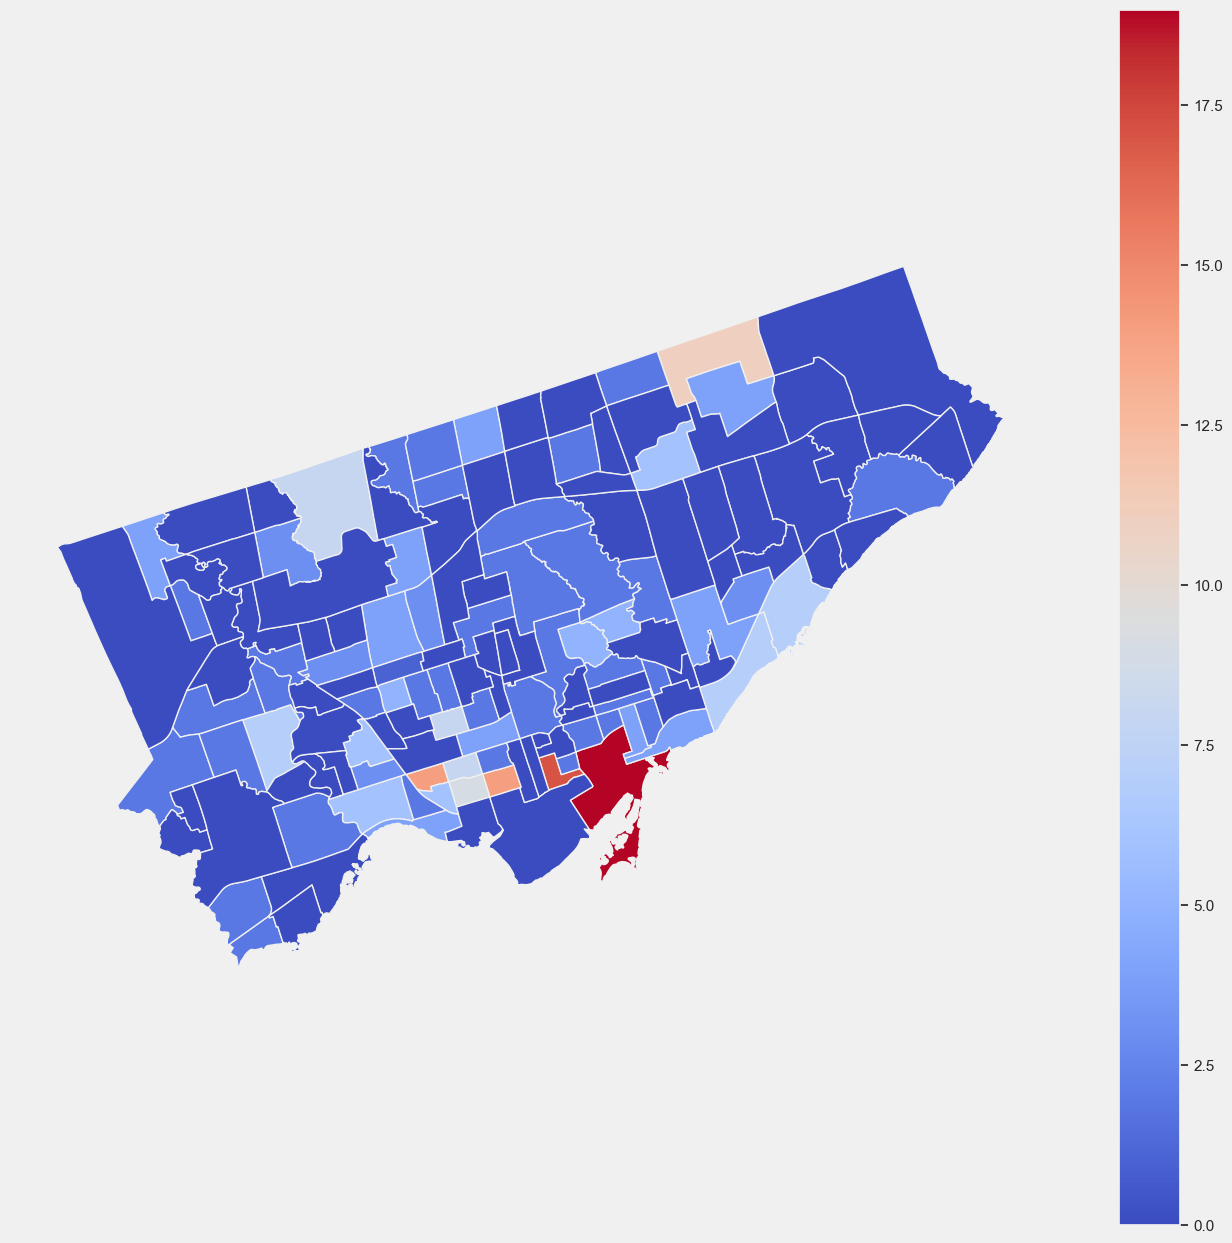

In [397]:
# Set the threshold value
threshold = 10  # Adjust this value as needed

# Create a larger plot
fig, ax = plt.subplots(figsize=(15, 15))  # Set the size (width, height) as needed

# Plot the geometry and color code the map based on a third column
col_count_neighbour_gdf.plot(column='INDEX_', legend=True, aspect=1, ax=ax, cmap='coolwarm')

# Remove x and y axis
ax.set_axis_off()

plt.savefig('/Users/joycechen/Desktop/python figure/top5_neighbourhoods_no_label.png', bbox_inches = 'tight', facecolor = 'white')

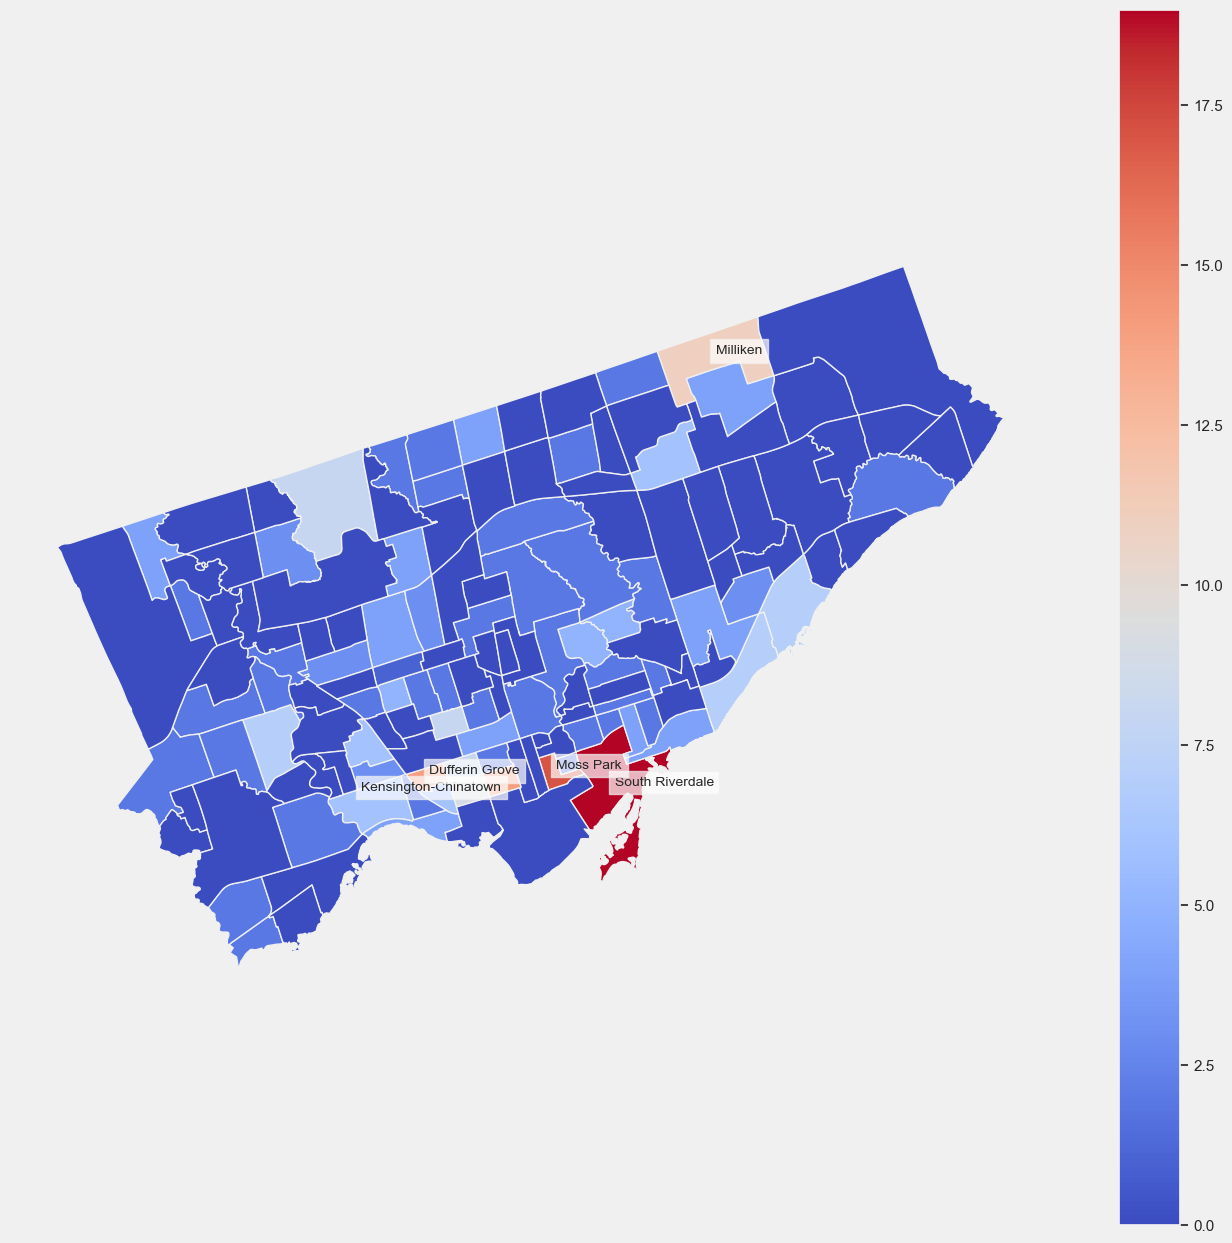

In [396]:
# Set the threshold value
threshold = 10  # Adjust this value as needed

# Create a larger plot
fig, ax = plt.subplots(figsize=(15, 15))  # Set the size (width, height) as needed

# Plot the geometry and color code the map based on a third column
col_count_neighbour_gdf.plot(column='INDEX_', legend=True, aspect=1, ax=ax, cmap='coolwarm')

# Add data labels using values from another column
texts = []
for idx, row in col_count_neighbour_gdf.iterrows():
    if row['INDEX_'] > threshold:
        point = Point(row.geometry_y.centroid.x, row.geometry_y.centroid.y)
        text = plt.text(point.x, point.y, str(row['name']), ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        texts.append(text)

# Adjust label positions to avoid overlap
adjust_text(texts, ax=ax, precision=0.5, expand_text=(1.01, 1.01), force_text=(0.5, 0.5), lim=1000)

# Remove x and y axis
ax.set_axis_off()

plt.savefig('/Users/joycechen/Desktop/python figure/top10_neighbourhoods.png', bbox_inches = 'tight', facecolor = 'white')

Accidents normalized by population and by area

In [369]:
neighbourhoods_population = neighbourhoods_joined[['name','population', 'area']]
neighbourhoods_population.head()

,name,population,area
0,Wychwood,51200,1.682042
1,Yonge-Eglinton,49640,1.650421
2,York University Heights,113020,13.246739
3,Yorkdale-Glen Park,66500,6.038310
4,Lambton Baby Point,31860,1.781869


In [393]:
col_count_neighbour_gdf.head()
collision_population_area = pd.merge(col_count_neighbour_gdf, neighbourhoods_population, on = 'name', how = 'outer')
collision_population_area['geometry'] = collision_population_area['geometry_y']
collision_population_area = collision_population_area[['name','population', 'area', 'geometry','INDEX_']]
collision_population_area_gdf = gpd.GeoDataFrame(collision_population_area, geometry='geometry')
collision_population_area_gdf['collisions per 10,000 people'] = 10000*collision_population_area_gdf['INDEX_']/collision_population_area_gdf['population']
collision_population_area_gdf = collision_population_area_gdf.fillna(0)
collision_population_area_gdf = collision_population_area_gdf.sort_values('collisions per 10,000 people', ascending = False)
collision_population_area_gdf.head()

,name,population,area,geometry,INDEX_,"collisions per 10,000 people"
3,Dufferin Grove,44860.0,1.387967,"POLYGON ((624994.97950 4834931.30673, 625012.5...",14.0,3.120820
1,Moss Park,85960.0,1.413028,"POLYGON ((632910.60436 4834938.34960, 632883.5...",17.0,1.977664
2,Kensington-Chinatown,72480.0,1.534607,"POLYGON ((628713.65284 4833925.53480, 628698.1...",14.0,1.931567
0,South Riverdale,111260.0,10.964701,"POLYGON ((634788.01970 4834074.43175, 634789.4...",19.0,1.707712
7,Wychwood,51200.0,1.682042,"POLYGON ((626071.50263 4837537.75607, 626151.7...",8.0,1.562500


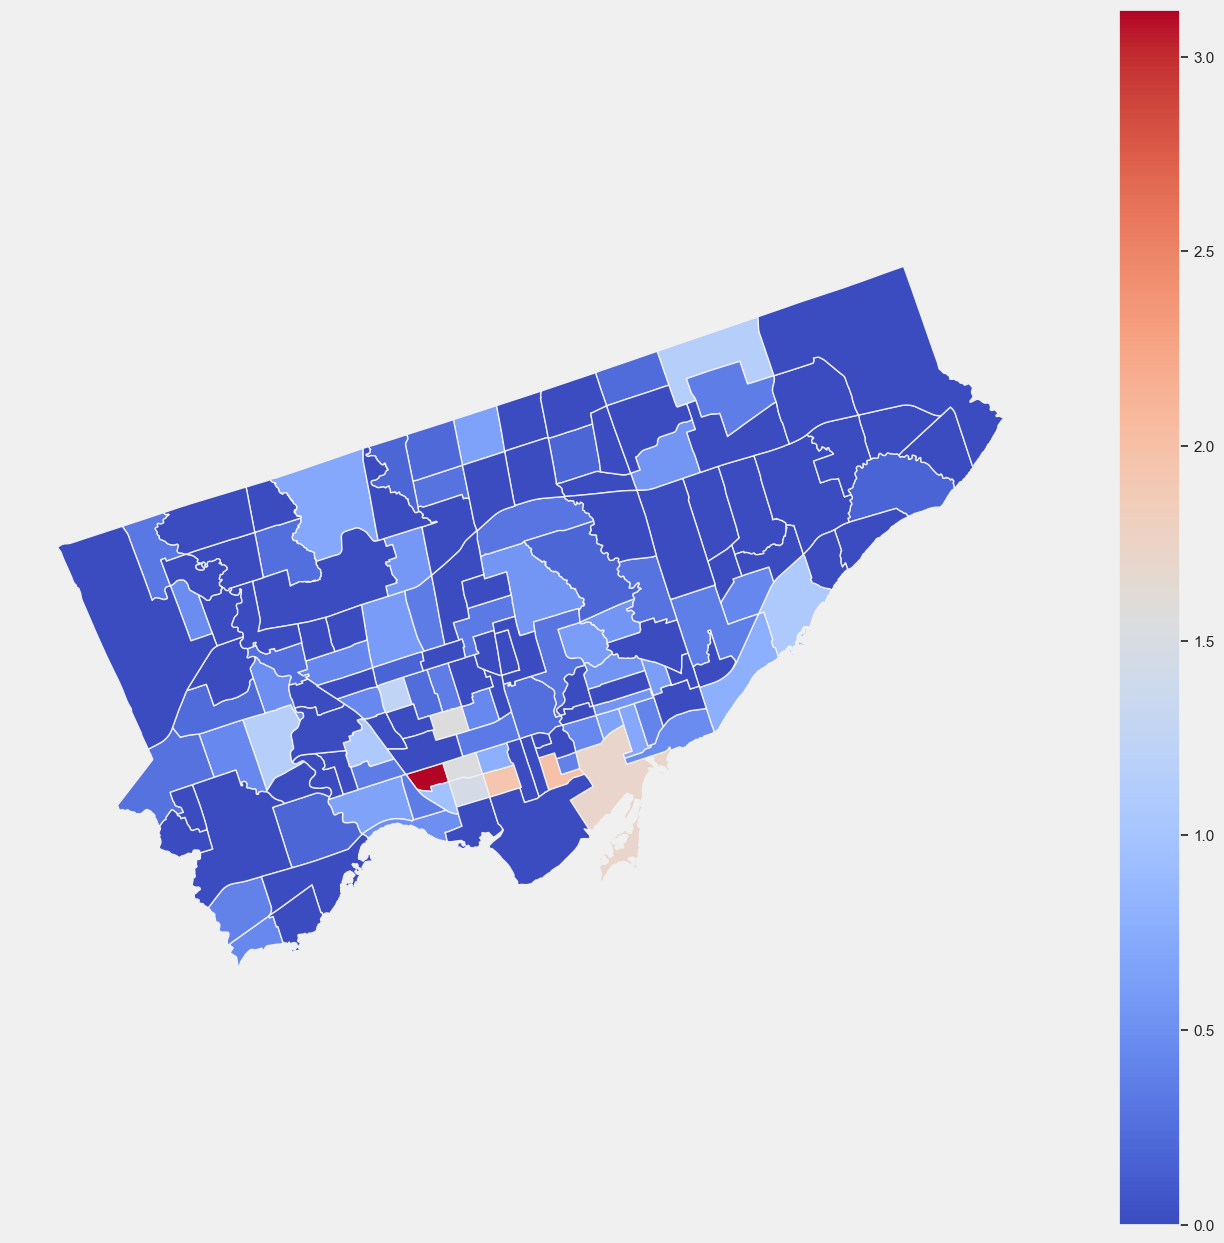

In [398]:
# Set the threshold value
threshold = 1.55  # Adjust this value as needed

# Create a larger plot
fig, ax = plt.subplots(figsize=(15, 15))  # Set the size (width, height) as needed

# Plot the geometry and color code the map based on a third column
collision_population_area_gdf.plot(column='collisions per 10,000 people', aspect=1, ax=ax, cmap='coolwarm', legend = True)

# Remove x and y axis
ax.set_axis_off()

plt.savefig('/Users/joycechen/Desktop/python figure/top5_neighbourhoods_normalized_by_population_no_label.png', bbox_inches = 'tight', facecolor = 'white')

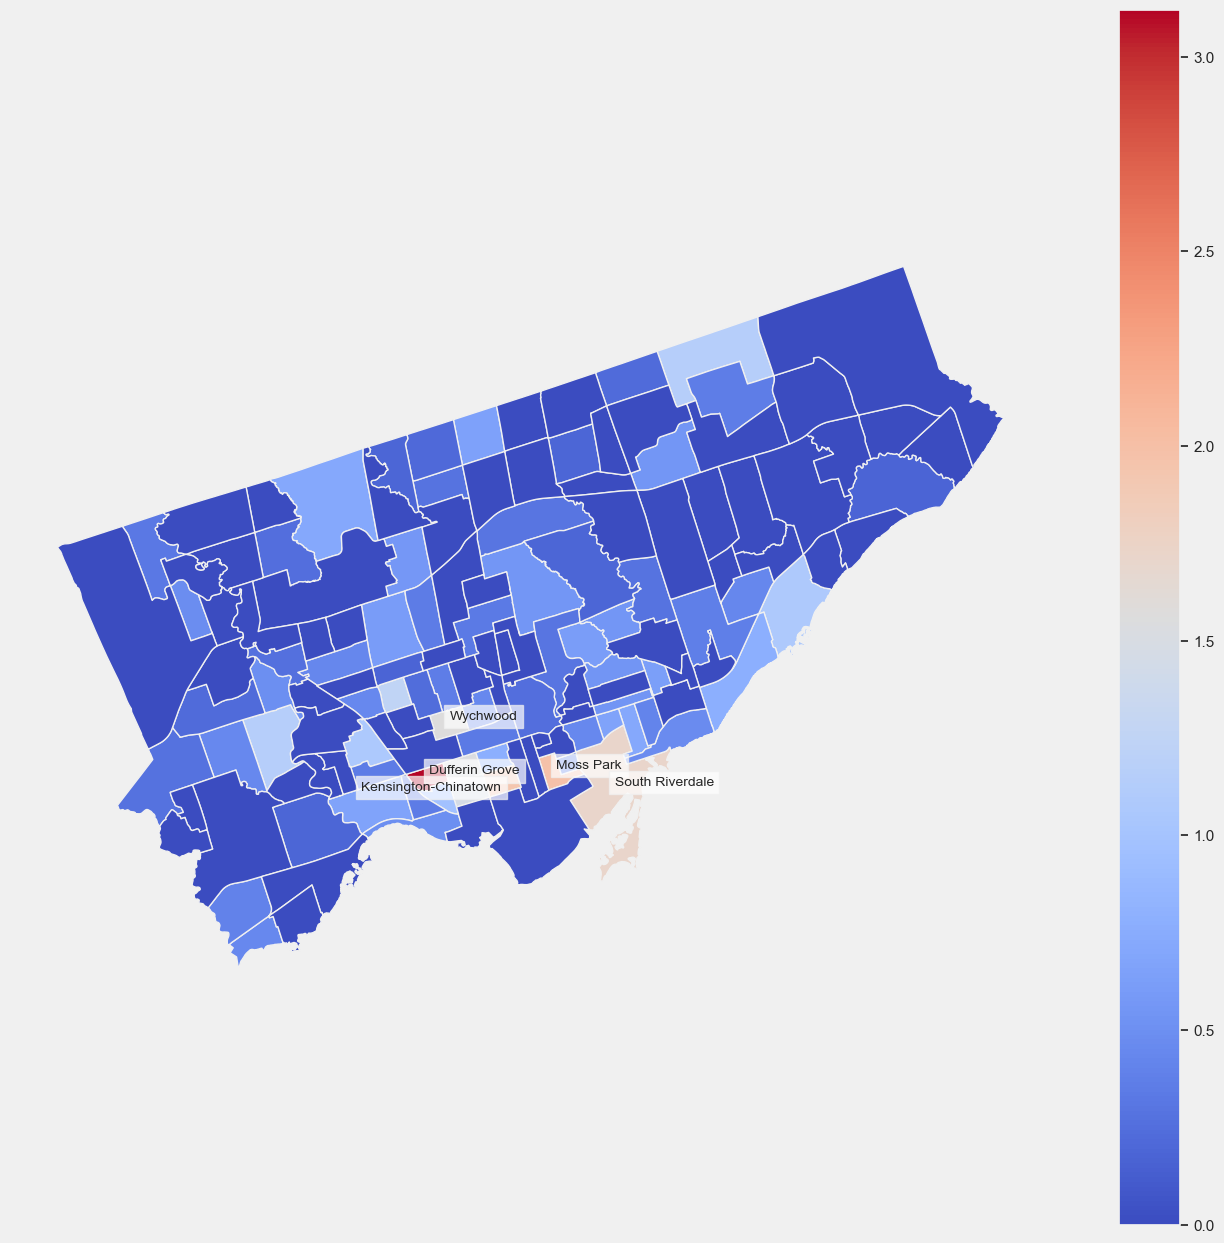

In [395]:
# Set the threshold value
threshold = 1.55  # Adjust this value as needed

# Create a larger plot
fig, ax = plt.subplots(figsize=(15, 15))  # Set the size (width, height) as needed

# Plot the geometry and color code the map based on a third column
collision_population_area_gdf.plot(column='collisions per 10,000 people', aspect=1, ax=ax, cmap='coolwarm', legend = True)

# Add data labels using values from another column
texts = []
for idx, row in collision_population_area_gdf.iterrows():
    if row['collisions per 10,000 people'] > threshold:
        point = Point(row.geometry.centroid.x, row.geometry.centroid.y)
        text = plt.text(point.x, point.y, str(row['name']), ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        texts.append(text)

# Adjust label positions to avoid overlap
adjust_text(texts, ax=ax, precision=0.5, expand_text=(1.01, 1.01), force_text=(0.5, 0.5), lim=1000)

# Remove x and y axis
ax.set_axis_off()



plt.savefig('/Users/joycechen/Desktop/python figure/top5_neighbourhoods_normalized_by_population.png', bbox_inches = 'tight', facecolor = 'white')